In [24]:
from bs4 import BeautifulSoup
from pprint import pprint
from urllib import request
from nltk import sent_tokenize
import nltk.data
from nltk.corpus import stopwords
# import matplotlib.pyplot as plt
import nltk
import json
import time
import sys
import re
import numpy
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math

nltk.data.path.append('D:/WS/MSc/TMP/nltk_data')

RESOURCES_PATH_LINKS = 'Resources/Corpora/EU/Links/'
RESOURCES_PATH_POSTS = 'Resources/Corpora/EU/Posts/'
RESOURCES_COMPLETE_CORPORA_FILENAME = 'complete_wow_class_posts_dict'


class WowClassesResources:

    def __init__(self):
        None

    WOW_FORUM_ROOT_URL_EU = 'http://eu.battle.net'
    WOW_FORUM_ROOT_URL_US = 'http://us.battle.net'
    WOW_FORUM_MID_URL = '/forums/en/wow/'
    URL_PAGE_ATTRIBUTE = "?page="

    WOW_CLASS_LIST_EU = [('Death Knight', "874789/"),
                      ('Demon Hunter', "19369494/"),
                      ('Druid', "874790/"),
                      ('Hunter', "874791/"),
                      ('Mage', "874792/"),
                      ('Monk', "6038099/"),
                      ('Paladin', "874793/"),
                      ('Priest', "874794/"),
                      ('Rogue', "874795/"),
                      ('Shaman', "874796/"),
                      ('Warlock', "874929/"),
                      ('Warrior', "874930/")]
    WOW_CLASS_LIST_US = [('Death Knight', "1012662/"),
                      ('Demon Hunter', "22813967/"),
                      ('Druid', "1012663/"),
                      ('Hunter', "1012664/"),
                      ('Mage', "1012760/"),
                      ('Monk', "7379141/"),
                      ('Paladin', "1012668/"),
                      ('Priest', "1012666/"),
                      ('Rogue', "1012667/"),
                      ('Shaman', "1012669/"),
                      ('Warlock', "1012670/"),
                      ('Warrior', "1012759/")]

    class GameType:
        # PVP: 2v2 3v3 5v5 cc
        # AB, AV, BET, DR, Efc, EotS, FC, FR, FRR, IoC, LH, LM, Mid, MT, SW, Stags,
        # SoTA, SSM, ST, TB, ToK, TP, TP, WG, WSG, WV, WW, arena
        PVP = 'pvp'
        # PVE: heroic, mythic, mythic+, m+, scenario, boss, mobs, time-walking
        # LFR
        # ZF, WC, VC, DM, Ulda, UBRS, Strat, Stocks, Stockade, ST, AH, SM, SH, SFK, Scholo, RFK, RFD, RFC, MC, Mara, LBRS, Gnomer, DM Warpwood, DM East, BWL, BRD, BFD, AQ40, TAQ, AQ10, RAQ, 
        PVE = 'pve'
        OTHER = 'other'
        PVP_CRITERIA = ['pvp', '2v2', '3v3', '5v5', 'cc',
                        'AB', 'AV', 'BET', 'DR', 'Efc', 'EotS', 'FC', 'FR', 'FRR', 'IoC',
                        'LH', 'LM', 'Mid', 'MT', 'SW', 'Stags', 'SoTA', 'SSM', 'ST', 'TB',
                        'ToK', 'TP', 'TP', 'WG', 'WSG', 'WV', 'WW',
                        'arena', 'bg', 'rbg', 'warsong', 'flag', 'capture', 'fr', 'fc', 'ftw',
                        'duel', 'skirmish', 'lom', 'arathi', 'los', 'focus', 'nuke', 'poly',
                        'sheep', 'alterac', '2s', '3s', '5s', 'rated', 'rating', 'battleground',
                        'battle ground', 'nagrand', 'blade\'s edge', 'blades edge',
                        'tiger\'s peak', 'tigers peak', 'ashamane\'s fall', 'ashamanes fall',
                        'black rook hold', 'tol\'viron', 'tolviron', 'dalaran', 'ruins',
                        'championship', 'deepwind gorge', 'kotmogu', 'silvershard',
                        'twin peaks', 'gilneas', 'strand', 'ashran', 'gladiator', 'mmr',
                        'honor', 'prestige']
        PVE_CRITERIA = ['pve', 'heroic', 'mythic', 'mythic+', 'm+', 'scenario', 'boss', 'mobs',
                        'time-walk', 'time-walking'
                        'RFC', 'VC', 'DM', 'WC', 'SFK', 'Stocks', 'Stockade', 'BFD', 'Gnomer', 
                        'SH', 'SM', 'RFK', 'Mara', 'Ulda', 'DM', 'Warpwood', 'DM', 'East', 'Scholo', 
                        'RFD', 'Strat', 'ZF', 'BRD', 'ST', 'AH', 'LBRS', 'UBRS', 'AQ', 'RAQ', 'MC',
                        'BWL', 'AQ40', 'TAQ', 'Ramps', 'BF', 'SP', 'UB', 'MT', 'AC', 'AS', 'Seth',
                        'Seth', 'Halls', 'SV', 'SH', 'Shatt', 'Halls', 'SL', 'Slabs', 'OH',
                        'DH', 'DK', 'Durn', 'Mech', 'Bot', 'Arc', 'BM', 'MgT', 'Terrace', 'MrT',
                        'HoR', 'Naxx', 'OS', 'Sarth', 'Vault', 'VoA', 'Maly',
                        'EoE', 'Uld', 'TC', 'ToC', 'TotC', 'ToGC', '(Heroic)', 'Ony',
                        'RS', 'Hal', 'ICC', 'UK', 'UTK', 'Nexus', 'Nex', 'AZN', 'AN', 'ANK',
                        'OLD', 'AKO', 'OK', 'DTK', 'VH', 'GD', 'HOS', 'Occ', 'HOL', 'UP', 'Culling',
                        'COS', 'Champ', 'ToC', 'FoS', 'PoS', 'TotT', 'BRC', 'SC', 'VP', 'LCoT', 'GB',
                        'HoO', 'H-DM', 'H-VC', 'H-SFK', 'ZA', 'ZG', 'ET', 'WoE', 'HoT', 'BH',
                        'BoT', 'TFW', 'BWD', 'FL', 'DS', 'SH', 'Scholo', 'TJS', 'SB', 'MP',
                        'SPM', 'GSS', 'SNT', 'MV', 'HoF', 'TES', 'ToT', 'SoO', 'BSM', 'Auch', 'SR',
                        'GD', 'SBG', 'EB', 'UBRS', 'HM', 'BF', 'BRF', 'HC', 'HFC', 'arc', 'VoW', 'MoS',
                        'CoS', 'EN', 'BRH', 'RtK', 'arc', 'ToV', 'VH', 'CoN', 'EoZ', 'NL', 'HoV', 'GR',
                        'DHT', 'DT']

WOW_TOPIC_URLS_EU = \
    [(c, WowClassesResources.WOW_FORUM_ROOT_URL_EU + WowClassesResources.WOW_FORUM_MID_URL + u)
     for (c, u) in WowClassesResources.WOW_CLASS_LIST_EU]

In [25]:
print(WOW_TOPIC_URLS_EU[0])
url = WOW_TOPIC_URLS_EU[0][1]
# req = request.Request(url)
response = request.urlopen(url)
html = response.read().decode('utf8')
print(html[:100])

('Death Knight', 'http://eu.battle.net/forums/en/wow/874789/')





<html xmlns="http://www.w3.org/1999/xhtml">

<head>
	<meta http-equiv="X-UA-Compatible" content="


In [26]:
def get_page_content(url):
    attempt_number = 0
    while True:
        attempt_number += 1
        if attempt_number > 5:
            return None
        try:
            response = request.urlopen(url)
        except request.HTTPError as e:
            print('HTTPError = ' + str(e.code))
            continue
        except Exception as e:
            print(e)
            continue
        except e:
            print(e)
            continue
        html = response.read().decode('utf8')
        break
    return html


def topic_scrape(forum_url):
    all_links = []
    i = 1
    while True:
        html = get_page_content(forum_url + WowClassesResources.URL_PAGE_ATTRIBUTE + str(i))
        if html is None:
            return []
        bs_html = BeautifulSoup(html, "html.parser")

        all_link_elements = bs_html.find_all("a", class_="ForumTopic")
        # pprint(all_link_elements)
        link_count = len(all_link_elements)
        print(str(i) + ' ' + str(link_count))

        if link_count == 0:
            print('Exiting')
            break
        for a in all_link_elements:
            # print a
            title = a.find(class_='ForumTopic-title').get_text().strip()
            # print title
            all_links.append((a['href'], title))
        i += 1
        time.sleep(3)
    return all_links


def extract_topic(topic_title_url_tuple):
    topic_url_ending = topic_title_url_tuple[0]
    topic_title = topic_title_url_tuple[1]
    pprint('[' + topic_title + '] (' + topic_url_ending + ')')
    all_posts = []
    i = 1
    while True:
        html = get_page_content(
            WowClassesResources.WOW_FORUM_ROOT_URL_EU + topic_url_ending + WowClassesResources.URL_PAGE_ATTRIBUTE + str(
                i))
        if html is None:
            return []
        bs_html = BeautifulSoup(html, "html.parser")

        all_topic_post_elements = bs_html.find_all("div", class_="TopicPost-content")
        # pprint(all_topic_post_elements)
        link_count = len(all_topic_post_elements)
        # print str(i) + ' ' + str(link_count)

        if link_count == 0:
            print('Exiting')
            break
        for element in all_topic_post_elements:
            # print a
            post_body = element.find(class_='TopicPost-bodyContent').get_text().strip()
            post_date = element.find("a", class_='TopicPost-timestamp')['data-tooltip-content']
            author_element = element.find("span", class_='Author-name')
            if author_element is not None:
                # post_author = '<UNKNOWN>'
                if author_element.a is not None:
                    post_author = author_element.a.get_text().strip()
                else:
                    post_author = author_element.get_text().strip()
                all_posts.append((topic_title, post_date, post_author, post_body))
        i += 1
        time.sleep(5)
    pprint('posts: ' + str(len(all_posts)))
    return all_posts


def save_to_json_file(path, file_name, content, mode):
    with open(path + file_name + '.json', mode) as out_file:
        json.dump(content, out_file)


def read_from_json_file(path, file_name):
    try:
        with open(path + file_name + '.json', 'r') as in_file:
            return json.load(in_file)
    except FileNotFoundError as e:
        print('File not found, skipping read for: ' + path + file_name)

In [27]:
# READ CURRENT CLASS TO WORK WITH, READ ALL CORPORA
currentClass = WOW_TOPIC_URLS_EU[0]
print('Current Class: ' + currentClass[0] + ', URL: ' + currentClass[1])
# READ DICTIONARY OF POSTS
posts_by_class = read_from_json_file('Resources/Corpora/EU/Posts/', 'corpora_posts_' + currentClass[0])
print('Number of posts: ' + str(len(posts_by_class[currentClass[0]])))
# print('First post:\n' + posts_by_class[currentClass[0]][0][3])

all_posts_dict = read_from_json_file(RESOURCES_PATH_POSTS, RESOURCES_COMPLETE_CORPORA_FILENAME)
print(all_posts_dict.keys())
for wow_class in all_posts_dict:
    print(wow_class + ': ' + str(len(all_posts_dict.get(wow_class))) + ' posts\t\t' 
          + 'Longest post length: ' + str(max(len(p[3]) for p in all_posts_dict[wow_class])))
    
# print(sys.maxsize)
# posts_with_game_type = {currentClass[0]: []}
from _operator import index

posts_with_game_type_dict = {}

for wow_class in all_posts_dict:
    print('Processing: ' + wow_class)
    posts_with_game_type_dict[wow_class] = []
    i = 0
    for post in all_posts_dict[wow_class]:
        i += 1
        if i % 1000 == 0:
            print("Progress: " + str(i) + '/' + str(len(all_posts_dict[wow_class])))
        
        postBody = post[3]
        post.append(WowClassesResources.GameType.OTHER)
        pvpIndex = sys.maxsize
        pveIndex = sys.maxsize
        
        # find PVP minimum index
        for crit in WowClassesResources.GameType.PVP_CRITERIA:
            critMatch = re.search(r'\b' + crit.lower() + r'\b', postBody.lower())
            if critMatch is not None:
                ind = critMatch.start()
            else:
                continue
            if ind != -1:
                pvpIndex = min(pvpIndex, ind)
        # find PVE minimum index
        for crit in WowClassesResources.GameType.PVE_CRITERIA:
            critMatch = re.search(r'\b' + crit.lower() + r'\b', postBody.lower())
            if critMatch is not None:
                ind = critMatch.start()
            else:
                continue
            if ind != -1:
                pveIndex = min(pveIndex, ind)

        if pvpIndex == sys.maxsize and pveIndex == sys.maxsize:
            post[4] = WowClassesResources.GameType.OTHER
        elif pvpIndex != sys.maxsize and pveIndex == sys.maxsize:
            post[4] = WowClassesResources.GameType.PVP
        elif pvpIndex == sys.maxsize and pveIndex != sys.maxsize:
            post[4] = WowClassesResources.GameType.PVE
        elif pvpIndex <= pveIndex:
            post[4] = WowClassesResources.GameType.PVP
        else:
            post[4] = WowClassesResources.GameType.PVE
        # posts_with_game_type_dict[wow_class].append(post)

posts_with_game_type_dict = all_posts_dict
# pprint(posts_with_game_type[currentClass[0]][:10])
print(posts_with_game_type_dict.keys())
pprint(posts_with_game_type_dict['Death Knight'][:3])

Current Class: Death Knight, URL: http://eu.battle.net/forums/en/wow/874789/


Number of posts: 34186


dict_keys(['Demon Hunter', 'Death Knight'])
Demon Hunter: 11916 posts		Longest post length: 7895
Death Knight: 34186 posts		Longest post length: 14170
Processing: Demon Hunter


Progress: 1000/11916


Progress: 2000/11916


Progress: 3000/11916


Progress: 4000/11916


Progress: 5000/11916


Progress: 6000/11916


Progress: 7000/11916


Progress: 8000/11916


Progress: 9000/11916


Progress: 10000/11916


Progress: 11000/11916


Processing: Death Knight


Progress: 1000/34186


Progress: 2000/34186


Progress: 3000/34186


Progress: 4000/34186


Progress: 5000/34186


Progress: 6000/34186


Progress: 7000/34186


Progress: 8000/34186


Progress: 9000/34186


Progress: 10000/34186


Progress: 11000/34186


Progress: 12000/34186


Progress: 13000/34186


Progress: 14000/34186


Progress: 15000/34186


Progress: 16000/34186


Progress: 17000/34186


Progress: 18000/34186


Progress: 19000/34186


Progress: 20000/34186


Progress: 21000/34186


Progress: 22000/34186


Progress: 23000/34186


Progress: 24000/34186


Progress: 25000/34186


Progress: 26000/34186


Progress: 27000/34186


Progress: 28000/34186


Progress: 29000/34186


Progress: 30000/34186


Progress: 31000/34186


Progress: 32000/34186


Progress: 33000/34186


Progress: 34000/34186


dict_keys(['Demon Hunter', 'Death Knight'])
[['[Guide]Death Knight 101 (Updated for 7.03)',
  '22/05/2014 11:27',
  'Hakuteiken',
  'This if for all the really new Death Knights; my guide on the class '
  "overall. In this guide I'll be covering our resource system, what abilities "
  "you have, how they work and what they do. I'll also throw in some "
  'suggestions on gameplay that should make things somewhat easier for '
  "you.It's worth nothing that Death Knights, at lower levels, are "
  'ridiculously powerful which is a state of affairs I found to be really dull '
  "when leveling my latest Death Knight; it's not much fun when you're "
  'immortal and killing things with 2-3 attacks, but anyway, here goes.First '
  "thing's first; Resources-We have two different resources; Runes and Runic "
  'Power.We have a total of 6 runes which can be used for any attack that '
  'costs Runes; Obliterate, Howling Blast, Festering Strike, Marrowrend '
  'etc.-Runic Power is generated from use

In [28]:
# RESTRUCTURE TO CLASS/Game Type/author/list of posts
# pprint([w[3] for w in posts_with_game_type_dict['Death Knight'] if w[4] == 'pve'][2:15])
posts_by_class_gametype_author = {}
    
for wow_class in posts_with_game_type_dict:
    # print('***' + wow_class)
    posts_by_class_gametype_author[wow_class] = {'pve': {}, 'pvp': {}, 'other': {}}
    for w in posts_with_game_type_dict[wow_class]:
        # print(w[2])
        if w[2] not in posts_by_class_gametype_author[wow_class][w[4]]:
            # print(w[4] + ': ' + w[2])
            posts_by_class_gametype_author[wow_class][w[4]][w[2]] = []
        posts_by_class_gametype_author[wow_class][w[4]][w[2]].append((sent_tokenize(w[3]), w[1]))

# COUNT posts
c = 0
for wow_class in posts_by_class_gametype_author:
    print('**** ' + wow_class)
    for gt in posts_by_class_gametype_author[wow_class]:
        print('** ' + gt + ': ' + str(len(posts_by_class_gametype_author[wow_class][gt])))
        for au in posts_by_class_gametype_author[wow_class][gt]:
            for p in posts_by_class_gametype_author[wow_class][gt][au]:
                c += 1
            # print(au)
print(c)

# CURRENT STRUCTURE:
#   WOW_CLASS
#       PVE/PVE/OTHER
#           AUTHOR
#               (POST, DATE)

**** Death Knight
** pve: 4340
** pvp: 1268
** other: 4400
**** Demon Hunter
** pve: 1683
** pvp: 536
** other: 1691
46102


Demon Hunter
  pve other   pvp 
 6112  4655  1149 
None


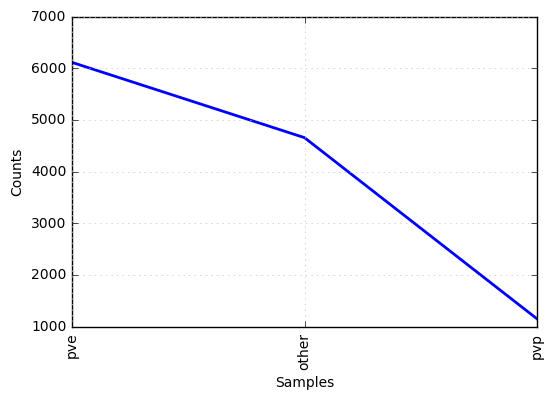

None
Death Knight
  pve other   pvp 
17063 14008  3115 
None


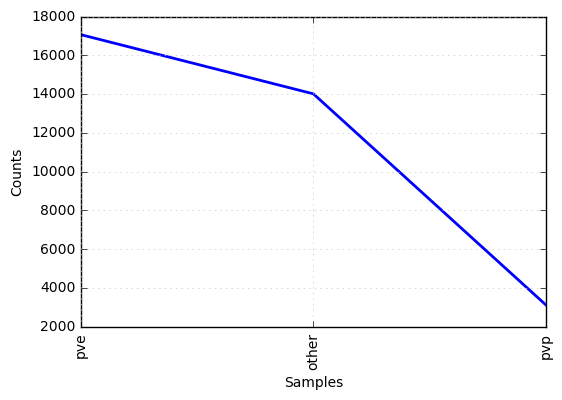

None


In [29]:
# plot histogram of findings
for wow_class in posts_with_game_type_dict:
    post_game_type_distribution = [post[4] for post in posts_with_game_type_dict.get(wow_class)]
    fdistGameType = nltk.FreqDist(post_game_type_distribution)
    print(wow_class)
    pprint(fdistGameType.tabulate())
    pprint(fdistGameType.plot())

In [30]:
# Print structure:
pprint('Dict level 1: ' + str(posts_by_class_gametype_author.keys()))
pprint('Dict level 2: ' + str(posts_by_class_gametype_author['Death Knight'].keys()))
pprint('Dict level 3: ' + str(list(posts_by_class_gametype_author['Death Knight']['pvp'])[:5]) + ' ...')
pprint('Dict level 4: ' + str(posts_by_class_gametype_author['Death Knight']['pvp']['Symmetry']))

"Dict level 1: dict_keys(['Death Knight', 'Demon Hunter'])"
"Dict level 2: dict_keys(['pve', 'pvp', 'other'])"
"Dict level 3: ['Exerz', 'Kayte', 'Mahl', 'Anomalous', 'Dextor'] ..."
('Dict level 4: [([\'Pact.\', "Conversion is dog now since the healing from it '
 "has been nerfed and you can't double tap it anymore.Conversion for RBGs "
 'though.", \'But just not in Arena.\', "In a melee cleave season conversion '
 'doesn\'t do jack.", \'It was good against lock teams last season - and '
 "almost every team had a Lock.'], '25/12/2014 02:56')]")


In [35]:
sid = SentimentIntensityAnalyzer()
# print(sid.polarity_scores('good bad ugly beautiful.'))
scores_by_class_gametype_author_post = {}
scores_by_class_gametype_author = {}
scores_by_class_gametype = {}
for wow_class in posts_by_class_gametype_author:
    scores_by_class_gametype_author_post[wow_class] = {}
    scores_by_class_gametype_author[wow_class] = {}
    scores_by_class_gametype[wow_class] = {}
    for gt in posts_by_class_gametype_author[wow_class]:
        scores_by_class_gametype_author_post[wow_class][gt] = {}
        scores_by_class_gametype_author[wow_class][gt] = []
        print(wow_class + ' ' + gt + ': ' + str(len(posts_by_class_gametype_author[wow_class][gt])))
        i = 0
        for author in posts_by_class_gametype_author[wow_class][gt]:
            scores_by_class_gametype_author_post[wow_class][gt][author] = []
            i += 1
            if i % 250 == 0:
                print(">>>\n>>>Progress: " + str(i) + '/'
                      + str(len(posts_by_class_gametype_author[wow_class][gt])))
            for post in posts_by_class_gametype_author[wow_class][gt][author][:2]:
                post_score = []
                for sent in post[0]:
                    post_score.append(sid.polarity_scores(sent)['compound'])
                #print(post_score)
                post_score_array = numpy.array(post_score)
                sc = numpy.mean(post_score_array)
                if sc > 0.5 or sc < -0.5:
                    # print(sc)
                    scores_by_class_gametype_author_post[wow_class][gt][author].append([post[0], sc])
            author_score_array = numpy.array([au_sc[1] for au_sc 
                                             in scores_by_class_gametype_author_post[wow_class][gt][author]])
            auth_sc = numpy.mean(author_score_array)
            if not math.isnan(auth_sc):
                scores_by_class_gametype_author[wow_class][gt].append((author, auth_sc))
                # print(author + ': ' + str(auth_sc))
        gt_score_array = numpy.\
            array([au_sc[1] for au_sc in scores_by_class_gametype_author[wow_class][gt]])
        gt_score = numpy.mean(gt_score_array)
        if not math.isnan(gt_score):
            scores_by_class_gametype[wow_class][gt] = gt_score
            print('***\n** ' + wow_class + ' ' + gt + ': ' + str(gt_score))

print('DONE!!!')

Death Knight pve: 4340
Exerz: -0.8312
Carminax: 0.9485
Voadiicia: 0.2779625
Sylmarien: 0.50255
Brewfasa: 0.294685714286
Zølack: 0.64715
Азриил: 0.294683333333
Anastas: -0.055875
Oh: 0.514325
Fallìng: 0.48368
Melvinftw: 0.6369
Eilith: 0.4939
Mongwan: -0.346266666667
Zackarus: 0.4361
Xethys: 0.2013
Terkan: 0.2990125
Haros: 0.9285
Rágnarök: -0.38404
Shagnasty: -0.64595
Untaraél: 0.3612
Marwix: -0.9359


D:\Soft\python351\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\Soft\python351\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Larixana: -0.07775
Plaguespawn: 0.2828
Revorgus: 0.50485
Graufenstein: 0.0272833333333
Stinka: 0.269125
Blaaky: 0.4019
Klegane: -0.313025
Baji: -0.6387
Sephrael: 0.63995
Faxes: 0.450375
Mothsphere: 0.7628
Azthea: 0.328385714286
Adamxyy: -0.33882
Thestor: 0.77945
Kalgash: 0.7131
Icetalon: -0.5106
Delaluz: 0.2747
Møbstarz: 0.4493
Samsing: 0.4035
Braylicious: -0.296
Gideach: 0.49005
Farycane: 0.2911
Verror: -0.510066666667
Lickity: 0.4404


Helwinter: 0.265975
Pakslaag: 0.629633333333
Anomalouß: 0.9332
Omar: -0.60615
Sunflowers: 0.40605
Future: 0.3982
Desecrated: -0.3727
Evìlyn: 0.7251
Ymirjar: 0.2732
Worldpeace: 0.67565
Rottencherry: -0.52825
Landthel: -0.34
Rozpierducha: 0.53005
Elfelavaisel: 0.6584
Màlavon: 0.301633333333


Willyv: 0.256975
Frostgank: -0.3102
Fuzzah: 0.38575
Omnima: 0.5108
Warferno: -0.34095
Dagleish: 0.9874
Nofi: 0.6901
Cheatéd: 0.557466666667
Neckbone: 0.916
Morthuus: 0.46295
Keanax: 0.857
Aljaska: 0.9661
Kelton: 0.4939
Decapitation: -0.4003
Rôckstar: -0.6908
Wölund: -0.3544
Gathion: -0.336175
Memorta: -0.3631
Zephius: -0.8133
Shagun: -0.4118
Tokka: 0.42114
Xersia: -0.032075
Tsujiro: 0.8409
Viperlime: 0.48985
Morrigän: 0.5302
Wychwård: -0.5578


Fennrir: 0.2520375
Grizzlechin: -0.2997
Drjack: -0.369957142857
Umbrakhor: -0.7134
Авел: 0.5266
Morgrann: -0.7184
Lightzum: 0.5267
Azryel: -0.25698
Cariboulou: 0.3315
Worlvius: -0.486608333333
Rylaicrystal: 0.439975
Thedraes: 0.407775
Necrozis: 0.5558
Spîrît: 0.259116666667
Hardwire: -0.743
Regá: 0.33245
Manicure: -0.66805
Dscourge: -0.42888
Archima: -0.296
Badbobby: 0.3909
Xyko: -0.658566666667


Koltrane: -0.461833333333
Zalduun: 0.27565
Blacklily: -0.8481
Equívalent: -0.4512
Terroto: -0.1786
Helkedir: 0.9756
Aushtaras: -0.4678
Luxan: 0.4215
Entaari: -0.271041666667
Grimrose: 0.34
Nøtsoholy: 0.3683
Jáimé: -0.4005
Grezknight: -0.610866666667
Rawflow: -0.3592
Thetracer: 0.605


Ajgistos: -0.380375
Brozone: 0.9712
Arthorious: 0.29495
Dallemi: 0.3682
Noxa: 0.2997
Zouch: -0.46185
Lucy: 0.3988
Iíìl: 0.4572
Mugoilolxoxo: -0.4549
Ríva: -0.3831
Joeysoap: -0.4939
Kaíne: -0.9136
Kylezsa: -0.38715
Màndy: 0.311033333333
Sinvicta: -0.6369
Søwtis: 0.4588
Dreagnor: 0.4659
Asphyxica: 0.4341
Melendir: -0.05645
Iganku: -0.06835
Rivornell: 0.27495


Obake: 0.04008
Sakon: -0.6554
Leothyr: 0.51405
Jesi: -0.3023
Ockham: 0.41584
Judgément: 0.383333333333
Fushi: 0.4706
>>>
>>>Progress: 250/4340
Shinybaron: 0.874
Derethas: -0.4777
Musti: 0.248133333333
Mabu: 0.264925
Besu: -0.4528
Heaat: 0.330816666667
Voldro: -0.2915
Riplela: 0.4696
Ilirah: -0.355933333333
Narali: 0.7227
Broloff: -0.9355
Rexipher: 0.273975
Elevenhunter: -0.51546
Beneteau: -0.5859
Raakkh: 0.3291


Wrathzz: -0.2987
Chrissucks: 0.238625
Víncent: 0.8867
Alonehunter: -0.326633333333
Fragshunter: -0.8625
Tenzarin: 0.5106
Larloch: -0.27115
Aracnophobia: -0.0193
Azathes: 0.34144
Coldbringer: 0.30915
Luckragol: -0.296
Makron: -0.6344625
Revudas: 0.2732
Tozhiro: 0.67905
Drought: 0.9445
Dashra: 0.3978
Lustraiser: -0.4106
Raskunda: -0.645633333333
Nuiq: 0.28595
Melaia: -0.3259
Chopen: -0.37134
Yama: 0.7979


Forxina: 0.5574
Darastus: 0.3612
Denzay: 0.37095
Parames: 0.36685
Angmaar: -0.3182
Semirha: 0.6433
Wilpo: 0.2625
Daylgiht: 0.5942
Farant: -0.379785714286
Rozza: 0.3506
Kadjitsu: -0.488875
Mâgisch: 0.5542
Nedlandftw: 0.3918
Remorselessx: 0.4939
Zeytoon: -0.300175
Evilempire: 0.3592
Gagö: 0.45175
Rimehoof: -0.34805
Rordor: 0.518
Ðeadelf: 0.86985
Darkanthem: -0.9398
Arthemida: 0.43895


Ahoqq: 0.4916
Lyriana: 0.3612
Plaguemane: 0.73425
Misscelirith: 0.6261
Soraeveth: -0.29
Bloodknght: -0.4767
Zakazh: 0.3089
Thórken: 0.5871
Borgúr: 0.4158
Raz: 0.561966666667
Hoshino: 0.7034
Gallantmon: -0.7944
Caitie: -0.695
Nimzana: 0.1852
Atilÿa: 0.29595
Chandelle: 0.7479
Tlite: 0.5574


Zeekor: -0.11245
Bryan: 0.032125
Theralion: 0.26532
Kátyperry: 0.44115
Anklebiterr: 0.9136
Zyglrox: 0.580033333333
Muimoridin: -0.8834
Dadruy: -0.4323
Nocturnil: 0.14925
Hericide: -0.3525
Icandomagic: 0.7469
Hordrim: 0.52565
Felborn: -0.258866666667
Soviet: 0.4318
Shinrayz: 0.4215
Jonasty: -0.3612
Nazragel: 0.5423
Lakoon: 0.4939
Saynis: -0.3929
Xuen: 0.639933333333
Raykim: 0.7717
Breakingßad: -0.9584
Avulsia: -0.5448


Leathertramp: 0.271733333333
Bonishin: 0.33068
Deathuni: -0.315925
Drundeath: 0.6249
Thalandrel: 0.6249
Anatheme: -0.00204166666667
Skjaldmö: 0.37095
Sollacer: 0.4767
Shadoweye: -0.131425
Dizlen: 0.6705
Dushen: -0.304375
Yobe: 0.8271
Asfdkljasd: -0.3246
Èsto: -0.2772
Kùth: 0.7184
Shyonia: -0.332175
Adidasler: 0.300575
Jenika: 0.8286
Knaxfudscha: -0.47655
Krurkan: -0.265633333333
Relios: -0.56485
Destroyer: 0.792666666667
Torvald: 0.4496
Waffy: 0.6369
Vincénth: 0.6114
Sithar: 0.29228
Einherjar: -0.47785
Gromga: 0.72185


Cezare: -0.4757
Gilberto: -0.3626
Nysche: 0.6208
Mxpain: -0.2588
Pxpx: 0.422566666667
Lfr: 0.8594
Awsa: 0.563814285714
Hollowed: -0.432466666667
Antinine: 0.351475
Jingknight: 0.2576
Neelkanth: 0.526
Geckoz: -0.37505
Riverblood: 0.31062


Xweiia: 0.573471428571
Scourged: -0.24235
Färdigheten: 0.8087
Lanabee: -0.4019
Yafellron: 0.57354
Lacandon: 0.6597
Ragæ: 0.6727
>>>
>>>Progress: 500/4340
Darnarius: -0.4544
Isilindalë: -0.482275
Deathyz: -0.2969
Yafellorn: 0.6779875
Tinababy: 0.3182
Kaenaster: 0.4588
Ardenaz: 0.022375
Lifemagic: 0.7964
Orichira: 0.2874
Moredith: -0.349514285714
Смердус: 0.307525
Laozhai: 0.5574
Infèrno: -0.284733333333
Jericho: 0.0128
Habrasay: 0.31525
Vulgrath: 0.09447
Hazuron: -0.7037
Tinypazuzu: -0.4536
Skullblast: 0.88155
Tinerius: 0.5674
Tinypanzer: 0.14455
Gaudium: -0.28595
Hrotha: -0.3716
Throdir: 0.56335
Silia: 0.365016666667
Jkes: 0.6249


Clontarf: -0.717975
Terryworgén: 0.464333333333
Ancientfrost: 0.65805
Злойдикей: -0.9052
Pixxels: 0.526583333333
Jeens: 0.34375
Xpería: 0.26204
Seph: -0.374975
Fnx: -0.8591
Krizzdarkzor: -0.7999
Judgepsycho: 0.876
Xyon: 0.59395
Wòózgrim: -0.446433333333
Rokanz: -0.6936
Orcasim: 0.418
Rineth: -0.277566666667
Zarozinia: 0.32362
Neliel: 0.409433333333
Icyblade: 0.6369
Zackarn: -0.287716666667
Laylaril: 0.62045
Massäcrë: 0.4588
Isabél: 0.6908
Suvah: 0.3896
Skaadra: 0.2504
Sartheris: 0.4225
Nedhealr: 0.502875
Korae: -0.3213
Calloway: -0.257233333333


Deadoqg: 0.34
Hárgor: 0.6155
Elisora: 0.385866666667
Tyne: -0.016125
Xylho: 0.64615
Zantious: 0.30538
Enthyy: -0.417
Mahtoro: 0.253183333333
Tsaritsin: 0.2063
Cusean: 0.3294
Gezrug: 0.7939
Kredo: -0.296
Zeusaijin: 0.6946
Roxaar: 0.8088
Deathfortold: -0.7319
Deathnander: 0.32436
Reliandra: 0.6696
Valherü: 0.3415
Velgrol: 0.252383333333
Abloodhunter: -0.3639625
Atkins: 0.35015
Seadweller: 0.4019
Babe: 0.2893
Trinitÿ: 0.54495
Soméoné: 0.6369
Голод: -0.401433333333
Nadreal: 0.9118


Morbidsaint: 0.39015
Desolve: -0.345875
Khaan: -0.458225
Xeoss: 0.846
Öenomaus: 0.8591
Kenshyrø: 0.70095
Neytira: -0.5256
Frostynar: 0.8126
Xyrosa: 0.041475
Troxa: -0.29545
Mortime: -0.430466666667
Stocken: 0.5499
Cellice: -0.8838
Corripio: 0.401616666667
Symbolistic: 0.53865
Saldura: 0.2732
Basementkat: 0.6018
Thebasher: 0.004
Blighthoof: 0.3565
Mechi: 0.34
Tuonii: 0.3182
Abôlisher: -0.412125
Sneakysweep: 0.399933333333
Kerathane: -0.0134375
Medínah: 0.86595
Tusani: 0.395075
Davse: 0.377316666667


Rencarex: -0.75425
Stickx: -0.5256
Runechampion: 0.310058333333
Deathhoix: 0.330575
Naklofen: -0.3818
Gohda: 0.2757
Mundus: -0.60485
Bigknickers: -0.334566666667
Arinyaa: 0.6369
Xeneith: -0.45765
Beann: -0.378475
Growlersdk: -0.410166666667
Hillbílly: -0.40145
Sukebe: 0.500707142857
Serathil: 0.37634
Haargroth: 0.3182
Ashwillow: -0.2713
Airell: 0.76815
Loonsta: -0.8307
Hopesedge: -0.5528
Ulaër: 0.7104
Кагэрис: -0.36755
Ádel: 0.382225
Naxû: 0.26335
Nethir: -0.34965
Brainlezz: 0.5952


Káge: 0.07743
Hinansho: 0.334
Alendoran: 0.254314285714
Wxms: 0.534633333333
>>>
>>>Progress: 750/4340
Cyriël: 0.7003
Sheltzy: 0.9661
Miylee: 0.411765
Necrotiqx: -0.503066666667
Gronuk: -0.26335
Lurkenhej: 0.5304
Bendo: 0.371975
Kynrin: -0.2553
Molismeni: 0.4168
Korro: 0.34
Hephaistíon: -0.2876
Mizchief: 0.3818
Caranor: 0.3953
Yunera: -0.4301
Nïmed: -0.03715
Deathzkrav: -0.4062
Fdgdrtaer: 0.307666666667
Schmilblik: -0.02825
Nocturne: 0.2563


Billybones: 0.2722
Доталошатало: -0.323966666667
Cìffíx: 0.6901
Ádmíral: 0.592466666667
Timertx: 0.2592
Raggaskank: -0.25458
Necyia: -0.7177
Veritor: 0.7436
Валхаллен: -0.3404
Thisqt: -0.5106
Kungfuskillz: -0.0500291666667
Realdurrty: 0.714
Darkrizk: 0.405066666667
Koromas: 0.306875
Nägash: -0.7506
Yôlô: 0.3612
Амерсх: 0.42315
Skatsecks: 0.30825
Zodd: 0.5927
Unholix: -0.6068
Sobieski: 0.2997
Bomberr: 0.250266666667
Orochîmaru: 0.531433333333


Shazura: -0.349266666667
Omgkd: -0.561542857143
Thaenkur: 0.4215
Chariza: -0.367733333333
Vandrain: 0.4506
Shiftrune: 0.525683333333
Skorn: 0.4247
Тевеш: 0.267416666667
Grimbane: 0.0503333333333
Araghon: 0.9674
Raidou: 0.6993
Evsknight: 0.8073
Dié: 0.431833333333
Dybbuk: -0.4767


Cératus: 0.8268
Zzjo: 0.8074
Dknynot: 0.54905
Stillrotting: 0.6963
Unholydiver: 0.2997
Ceridwynne: 0.6908
Warcon: 0.8679
Dracthar: 0.808
Malanos: -0.290128571429
Allòut: -0.00778125
Damoana: 0.397133333333
Accenato: 0.02685
Cadea: 0.1460375
Sherise: 0.5719
Ragganmore: 0.3612
Crow: -0.04328
Hakuteiken: 0.35805
Tezeniz: -0.3943
Mustis: -0.0532
Swemalin: -0.032225
Fennix: 0.9231
Abezethibod: 0.30995


Lunatic: 0.9719
Mannenntmìch: -0.360863636364
Zalamar: 0.7964
Parenthesis: -0.339866666667
Misery: 0.4344
Xubaju: 0.48068
Snowwight: -0.31415
Nincie: -0.257275
Ajjhala: 0.5824
Hellmer: -0.384
Sylosís: -0.480085714286
Angryßull: -0.4404
Vektron: 0.4215
Difionex: 0.425233333333
Talledon: 0.367228571429
Untwoord: -0.296
Ancìlla: 0.59715
Asmodaii: -0.9084
Crushallvein: 0.157725
Relictus: 0.631


Sikee: 0.42446
Smidz: -0.6983
Grommarr: 0.3294
Lîara: -0.3243
Uruwashii: 0.9403
Corbak: -0.5103
Gekkenhuis: 0.2676
Rithiel: 0.0229
Cál: 0.297333333333
Bonesnap: 0.25058
Senathor: -0.4389
Betabarry: 0.6696
Smackalot: 0.4019
Hairygrowler: 0.2824
Kung: 0.8504
Adlian: -0.322168402778
Bloodgaw: -0.328
Crìmson: -0.31935
Sae: -0.2701


Darksuit: -0.49618
Ilyrian: 0.8228
Astöria: 0.435071428571
Draenej: -0.2734
Taosunglou: -0.0810875
Dottie: 0.4404
Sephirìa: 0.53145
Numberzero: -0.2633
Hatébreed: 0.4375
Elauria: -0.4802
Gauldur: 0.282775
Kilyox: 0.388175
Lovecoil: -0.309266666667
Gamlesverker: 0.6537
Pestbuster: -0.160275
Thymalean: -0.8658
Zoldrage: -0.726625
Vollaittaa: 0.3109
Sahji: 0.4791
Runik: 0.33852
Djkarverqtx: 0.296
Noden: -0.19805
Vylenia: 0.7959


Saber: -0.265733333333
Thysalae: -0.4041
>>>
>>>Progress: 1000/4340
Elyssarain: 0.3039
Garimto: 0.596466666667
Zenty: -0.293
Rimereaver: 0.34
Bryantko: -0.0267
Belioro: 0.31525
Frankiefigz: -0.251
Fortvila: 0.5709
Infect: 0.6705
Wolfskinner: -0.7774
Gødlikez: 0.5017
Adam: 0.5387
Uòtinie: 0.25115
Darksyn: 0.38752
Metalcurse: -0.39225
Arhcon: 0.30795
Énnasus: -0.19302
Livepoopoo: 0.6369
Sßx: 0.411025


Malvagius: -0.29295
Chryz: -0.30557
Déstróyer: -0.0434
Avenjielde: 0.5768
Ocularis: -0.4215
Fragarch: 0.0430375
Rained: 0.0777
Masus: 0.4678
Minhaw: 0.383064285714
Galagor: -0.7999
Zardak: 0.4588
Emilboc: 0.473666666667
Litharia: -0.30325
Chondra: 0.49075


Dondeath: 0.4029
Conception: 0.28285
Icefever: -0.9274
Helqq: 0.534725
Omniyah: 0.27055
Frostfoxi: 0.139083333333
Raeda: 0.6915
Aélyra: 0.52235
Noveralia: -0.7524
Carant: -0.7291
Blightcube: 0.4404
Cervée: -0.3072875
Antidepresiv: 0.7876
Cyrisela: 0.6124
Deemorbid: 0.3252
Ylraa: -0.3825


Deepmoon: -0.55405
Bananadeath: 0.280691666667
Icelyn: -0.3013
Kindri: 0.4325
Destiñy: 0.33525
Hyaki: 0.64445
Elrinaa: 0.277675
Dayyka: -0.374457142857
Larthur: -0.1564125
Sstopme: 0.17435
Fallthor: 0.31845
Gaddek: 0.3612
Arlaen: 0.5661
Véndetta: 0.0315375
Sariku: 0.30645
Epicly: -0.2796
Lunch: 0.431
Slugathor: 0.3612
Windeath: -0.279033333333
Ikerion: 0.1030875
Tyvalt: -0.395
Futuristic: 0.5955
Fatwreck: -0.4643
Necrotickiss: -0.3734
Tyriev: 0.34
Goodnigut: 0.334116666667
Azgodan: 0.7615
Soulcalíbur: -0.1393


Noloa: 0.27495
Madvis: -0.7911
Susannia: -0.2732
Annihilia: 0.27115
Steelshade: 0.2752
Emo: -0.3645
Sefriol: 0.5095
Shïnou: -0.301675
Athrod: 0.5859
Ardenth: 0.31418
Mione: -0.5423
Felturtle: -0.4391
Despotica: 0.2732
Poweryakdk: 0.285033333333
Gueh: 0.773766666667
Ebonbladeje: 0.491325
Rotflap: -0.0127133333333
Hack: 0.259833333333
Thaldamar: 0.3367
Karzgrath: 0.55545
Nudler: -0.6808
Daruik: 0.27065
Dreadhôôf: 0.8508
Alesxandra: 0.803
Vansy: 0.6109
Trýnks: 0.285566666667
Esdeath: 0.357466666667
Skeewy: -0.394533333333
Calyhee: 0.42425


Ghoullove: 0.5716625
Zoliaxen: 0.3612
Raksada: -0.38915
Anothelas: 0.28535
Synixer: -0.29
Ajpeyo: -0.275
Pim: 0.5859
Dzerok: 0.290571428571
Syreana: 0.25905
Norhul: -0.339666666667
Arsonn: -0.7579
Akirian: -0.34995
Frostholic: 0.8264
Shiroz: 0.3393
Snør: 0.7668
Zåel: 0.365655
Alleriä: 0.8779
Korktre: -0.9732
Miseras: -0.0334
Kubarian: -0.8635
Kyrru: -0.3818
Aurghmeister: 0.277225
Gabenewell: -0.34
Diamondez: 0.438
Perwerka: 0.3626
Nickolps: -0.33985
Árjalainen: 0.278866666667
Veranell: -0.28825
Cohèn: 0.73855
Tiella: 0.303257142857
>>>
>>>Progress: 1250/4340
Frostfury: 0.277633333333
Rennoi: 0.317


Metelatas: 0.3535
Khazir: 0.1548
Euthanasia: 0.498933333333
Hunteroulaki: 0.6105
Dkpk: 0.156328571429
Dardelion: 0.4199
Sandalf: -0.6457
Abyssion: 0.3876
Tenebrìum: -0.8967
Dayzer: -0.34
Mobíus: 0.4404
Sugah: -0.4939
Toreslol: 0.09042
Djungeln: -0.2997
Deceiverz: 0.3818
Crønus: -0.3622
Akarî: -0.308166666667
Rokvar: 0.3612
Kiite: -0.8779
Sinthya: 0.7269
Xernath: -0.68425
Midan: -0.29605
Cirassel: 0.43275
Leapin: -0.261316666667
Alphéus: 0.443175
Mordreth: 0.6539
Zwart: -0.282525
Putsvinje: 0.62675
Sàtyr: -0.578925
Kogran: 0.4404
Facts: -0.3818


Whiteline: -0.5413
Endyn: -0.577866666667
Kermytina: -0.5423
Corenus: -0.3412
Kulîmu: 0.6369
Jetx: 0.4215
Sugartastic: -0.5994
Кэйтонх: 0.3818
Vaderia: -0.6597
Chrosis: -0.0454333333333
Émo: 0.3071
Halonox: 0.7456
Loxarion: -0.31845
Gamias: 0.365833333333
Chimichonga: 0.358766666667
Shodowfang: 0.6369
Squatthrust: -0.4066
Karabor: 0.8977
Puntz: 0.5315
Tarana: -0.69535
Záchary: 0.36755
Jokio: -0.3736
Tinasõdur: -0.2553
Lksnn: 0.3612
Blossom: -0.00998
Dirtymiki: -0.46218
Tarsilin: -0.0196
Hemski: 0.39135
Mólina: -0.243733333333


Northug: -0.3953
Darkrage: 0.5423
Madflipz: 0.0222321428571
Nebhaal: 0.70145
Deebug: 0.0723357142857
Morguhl: 0.3275
Mohrn: -0.6749
Namae: 0.7161
Thisfacker: 0.11145
Mísanthrope: 0.317133333333
Bladeandsoul: 0.4754
Emuhack: 0.6705
Marmaros: 0.2869
Naught: 0.25115
Drayser: 0.7319
Klaparen: -0.36755
Wrathael: -0.398873333333
Dyylan: 0.2967
Dxilence: 0.53045
Theophilus: 0.6064
Pifflord: 0.5267
Phoiyt: -0.4767
Emizel: -0.0816
Japhet: 0.4847
Keenann: -0.3428
Dreadeyes: -0.57285


Telkas: 0.51385
Destru: 0.31245
Shadowmourne: -0.00155
Vaeyn: -0.50684
Nightshrike: 0.31805
Альцеон: 0.44935
Sóxx: 0.6052
Thalea: 0.49905
Mixtli: 0.5574
Trevoo: -0.2584
Gyr: 0.3472
Armanispree: 0.4404
Koeienvanger: -0.66125
Necrofeelye: 0.337933333333
Tinawien: 0.4497
Karkantas: -0.8715
Léddi: 0.528475
Avixhawkk: 0.528366666667
Kailoren: 0.4215
Impøssible: 0.2752
Slamberry: -0.316833333333
Noìre: 0.457766666667
Benje: 0.39675
Thános: 0.52885
Grômkar: 0.4979
Félian: -0.4168
Izaniel: -0.3564
Ритуал: -0.9659
Korangar: -0.38065


Inflameprox: -0.293175
Banterus: 0.456
Sallahadin: 0.325575
Hurgo: 0.2781
Dour: -0.373
Bizzbrah: -0.282466666667
Vinnicus: 0.8452
Cuoco: 0.644075
Xivali: 0.4588
Dwarloc: 0.255957142857
Caplin: 0.8089
Rhawen: 0.76715
Firyal: 0.6908
Boneflayer: 0.31438
Dkdonkey: -0.2601
Kopke: -0.76635
Indicaqt: 0.31905
Júdgey: 0.607233333333
Jessicajones: 0.130633333333
Weazul: 0.4019
Gnul: -0.27222
Antiyou: 0.270566666667
Avelie: -0.5102
Lorax: 0.542927777778
Nímzana: 0.6901


Mikkelsén: 0.31234
>>>
>>>Progress: 1500/4340
Strife: 0.55735
Scrump: 0.39225
Stinkysocks: 0.5773
Callmezli: -0.8537
Sinndragossa: 0.7193
Zilpui: -0.5578
Filnaen: 0.7096
Dreadscream: 0.37895
Xarok: 0.8264
Zalrea: 0.04195
Avirah: 0.33715
Daarkknight: 0.443966666667
Mchammered: -0.3454
Zolgi: 0.5608
Vengerous: 0.6249
Armágeddön: 0.68245
Decrementix: -0.619842857143
Moxjet: 0.64285
Smackin: 0.3391
Héat: -0.2889


Nephs: -0.30535
Cnedra: 0.3243
Kikipow: 0.2702
Necria: 0.537
Wrolnik: -0.371528571429
Viki: 0.5199
Sazir: 0.6229
Сифрельдар: 0.286673333333
Zealie: 0.4135
Kaiko: 0.7685
Ðevastate: 0.6124
Isuril: 0.9253
Rooted: 0.2545
Alactus: 0.433466666667
Silaedru: 0.58985
Herpes: 0.44525
Enderer: 0.733633333333
Jayred: -0.2732


Evesion: 0.3419625
Doomstone: 0.71405
Sparg: 0.6648
Awwsorry: 0.369833333333
Vholchick: -0.11985
Geroz: -0.256866666667
Blightbeard: 0.448625
Duskspell: 0.74285
Aberath: 0.44695
Slashi: 0.46705
Bill: 0.4927
Kharthal: -0.7314
Isengrim: -0.3057
Crønøs: -0.64355
Littlekunt: -0.5267
Chilicharlie: 0.6411


Dawngate: -0.4584
Rixxen: 0.55165
Psyox: 0.3612
Grimgor: 0.82605
Skampie: 0.7951
Trikola: -0.638233333333
Ashing: 0.336125
Jasmille: -0.4008
Cryptelon: -0.197946666667
Triandis: 0.285428571429
Ðarkiing: -0.3624
Walkonwind: -0.3424
Lothyhar: 0.6035
Macer: -0.398
Murgthar: -0.544633333333
Celiu: 0.3121
Smouchiie: -0.303733333333
Biffie: -0.297416666667
Spìne: 0.5859
Omgapaladin: 0.7491
Seaal: 0.71055
Unemployment: 0.3913
Baoao: 0.7717
Kvasir: -0.7845
Argaraf: -0.2918
Heruini: 0.7425
Endemic: 0.534825


Rumanaama: 0.260814285714
Taigershock: -0.25115
Shíela: -0.262533333333
Edazlol: -0.37095
Batspine: 0.7964
Sczezly: 0.6877
Ondmann: 0.7717
Hellgrave: 0.0912
Düracell: -0.296
Qrmas: 0.3291
Sonarok: -0.72762
Cadlnvrdies: 0.28084
Nyk: -0.3491
Kortaz: -0.662275
Zionknight: -0.3548
Molocow: 0.3544
Nocturnäs: -0.6113
Showc: 0.7253
Julía: -0.2732
Psiharq: -0.743
Valarjar: 0.6898
Gyrm: 0.56045
Lazorcat: -0.2813
Mortacai: -0.953
Predlùlz: 0.480416666667
Vinkiiz: 0.45625


Grymvild: -0.502382608696
Dragonsworn: 0.43705
Geelgamesh: -0.35015
Rotten: 0.4404
Архисоло: -0.73605
Bloodgrave: 0.376333333333
Schmu: -0.499066666667
Darkhyper: -0.8795
Virulent: 0.5983
Ennuyée: -0.4479
Abalore: 0.2542
Zupermutant: 0.350666666667
Kojhuiyte: -0.4754
Blindsoul: 0.3186
Gareth: 0.42745
Hiigh: 0.30015
Teldorma: -0.337675
Return: -0.596425
Norlegende: 0.6114
Panzerfâust: 0.425
Gutan: 0.9464
Conors: 0.6417
Ikuya: 0.296
Deathshroud: 0.3609
>>>
>>>Progress: 1750/4340
Alleine: -0.5143
Karnage: 0.8468
Filoviridae: -0.8492
Alnya: 0.469975


Icecøld: 0.337633333333
Wesslén: 0.25115
Torakin: 0.7264
Barill: 0.2775
Agonishdeath: 0.4824
Rcz: 0.296
Stanson: 0.4927
Thaendil: -0.2553
Sinister: 0.538066666667
Kiiljah: 0.35315
Tuledk: 0.7269
Stranger: -0.564575
Malthaèl: 0.2745
Redglare: -0.42055
Tive: -0.5533
Dequé: 0.3313
Bastiôn: 0.8776
Archaus: 0.285166666667
Tarskal: 0.8807
Kemii: -0.451033333333
Pichkoza: 0.377433333333
Sepsis: -0.3071
Gitsan: -0.3662
Xumo: -0.4825
Jhinjíe: -0.68685


Touchtoomuch: 0.292875
Onryn: 0.496533333333
Kronik: -0.111141666667
Jimjam: -0.08265
Big: 0.6597
Frigidtouch: 0.446433333333
Unðedrtelðús: -0.2732
Slaggeh: -0.3349
Dhalan: -0.3592325
Ayaney: 0.5635
Reotheras: 0.6249
Nappyrash: 0.6249
Gokuson: 0.6124
Loreleí: 0.28574
Insegnoo: -0.2784
Sadblade: -0.5267
Darth: 0.609133333333
Sugarlol: 0.3818
Khörni: 0.2912
Arotha: 0.6116
Grímjaw: 0.509733333333
Tribaleyes: -0.68775
Varinia: 0.368766666667
Buldrek: 0.233375
Easyn: -0.29975
Crágoth: -0.6428
Heallarious: 0.8386
Alorian: -0.253417391304
Mewuvyou: 0.25915
Hammurabi: 0.411875
Aule: -0.25685
Deathteamer: 0.0293666666667


Lefthanded: 0.49265
Tipee: 0.639894444444
Thanah: 0.297
Peterdkay: -0.39085
Drekthull: -0.499975
Valendra: 0.2621
Ymiron: -0.351333333333
Nerovar: -0.320977777778
Mifra: 0.9001
Cirkus: 0.386325
Akrisae: 0.4088


Vathos: -0.631
Tyrusaran: -0.6207
Ottila: -0.5267
Holdmybeer: 0.49108
Sulin: 0.3816875
Lumpenlarry: 0.5574
Ginka: 0.4102
Eluneela: 0.7351
Elorisse: 0.25116
Huntsmead: 0.34125
Sejanus: -0.341866666667
Catstrangler: -0.885
Loneaxes: -0.4019
Karglat: -0.33135
Darkemporer: -0.268
Deinhardt: 0.3592125
Hélion: 0.475233333333
Kalcron: -0.513166666667
Thaldes: 0.9265
Túrwaithon: -0.5994


Icecóld: 0.4218
Valiera: 0.574433333333
Announced: 0.351227272727
Minorah: -0.396575
Glaciel: 0.3729
Asukà: -0.7579
Nodeal: 0.492966666667
Qari: 0.6369
Gamir: 0.64765
Tukam: -0.507
Ayshas: 0.502783333333
Winterchillz: 0.2545
Khaine: 0.418966666667
Çróòw: 0.9666
Sunyai: 0.304433333333
Nÿv: 0.133683333333


Sonofálich: -0.578358333333
Elondrë: 0.5667
Tonolo: 0.7414
Johnnybgoode: 0.75695
Budiax: -0.0113125
Lichepriest: 0.7783
Buvarette: 0.6801
Deathcomes: 0.3548
Basiun: -0.7862
Lorgus: 0.3412
Swaggerz: -0.3818
Skinnyhotted: -0.296
Arcaon: 0.421933333333
Paramet: 0.547933333333
Dunderbald: 0.327174285714
Bamischijf: 0.5106
Hogglebog: 0.784
Täll: -0.3812
Insomníum: -0.3732
>>>
>>>Progress: 2000/4340


Atermon: -0.696
Anlloverxx: 0.4404
Saiyko: 0.4215
Armand: 0.04445
Theahl: -0.375716666667
Dreamie: 0.30515
Azreth: 0.8176
Dnighte: -0.34
Malícé: 0.6908
Lypton: 0.31345
Jerollo: -0.7851
Javool: 0.40565
Syñergy: -0.4293
Valravn: -0.408188888889
ßigdikhorror: 0.89905
Thyranos: 0.554
Syraliss: -0.379471428571
Harukana: 0.38585
Rumstick: 0.293725
Céldora: 0.9473
Zevasra: -0.63495
Chompz: 0.267233333333
Idtankthat: 0.476
Styx: 0.38075
Wraithcaller: 0.42595
Dk: 0.54536
Byenkow: 0.66845
Kukuxumusu: -0.4382
Icaroz: 0.6761
Skurkovic: -0.279531578947
Altzyx: 0.31845
Machaera: 0.6743


Skarthis: -0.360566666667
Haemund: 0.1142
Clirver: 0.49135
Shapain: 0.426225
Asag: 0.50605
Xulrogg: 0.62675
Carnagz: 0.445175
Zolktte: 0.45005
Blite: 0.639933333333
Takralus: 0.5852
Anfauglith: 0.43545
Raidenrox: -0.28145
Undeadmortis: -0.3818
Lemiqt: 0.1285
Repid: 0.4588
Moudi: -0.887
Ganway: 0.31975
Nightskye: 0.72825
Kryael: 0.4019
Tasedo: 0.288183333333
Nurglle: 0.9426
Necrotíq: -0.19265
Omkommen: 0.9155
Narmôrà: -0.282027272727
Frostbaslisk: -0.26335
Isdroppe: -0.489525
Rokuma: -0.836
Korrosh: 0.391842857143
Avnar: 0.25418
Trekhan: 0.7149
Syldrea: -0.8232


Sael: -0.8777
Tasz: 0.81835
Caskirensys: 0.615641666667
Azzizz: 0.252866666667
Myrdhraal: 0.4221
Pryscilla: 0.34745
Lashin: 0.7175
Combo: 0.7329
Azihant: 0.6115
Neteari: 0.665175
Nathanél: -0.334146666667
Infuria: 0.491933333333
Velikan: 0.2874
Doijh: 0.1922125
Grotargh: 0.5859
Norwyn: -0.5224
Mokkoo: -0.5889
Laindessiel: 0.3062
Belszazar: 0.57195
Holdane: 0.277475
Moshyy: 0.3618


Valaisawsome: 0.4653
Negru: 0.5722375
Neiriel: 0.0237166666667
Isildas: 0.448866666667
Ahneasten: -0.7113
Tjãpps: -0.4363
Hase: 0.7269
Targray: 0.36708
Necrona: 0.4461
Dreshar: 0.6444
Substratum: -0.36345
Drekzhul: -0.29558
Jezzebelle: 0.322266666667
Tehreaper: 0.5481
Scoot: -0.3485
Rihannah: 0.463615
Magharlogosh: 0.7118


Degek: -0.3432
Eyescream: -0.43215
Werebeazt: -0.5672
Benicetome: -0.297666666667
Flúmmer: 0.7242
Descend: 0.569725
Ruairí: 0.5476
Kezest: -0.6304
Baiter: 0.712175
Ethioc: 0.265458333333
Bîshop: -0.3474
Hzero: 0.278457142857
Whufflen: 0.45725
Yurmama: 0.509883333333
Amduscas: 0.2608
Hemsläp: 0.56955


Alzmeel: -0.26636
Elivagar: -0.649
Decite: -0.148425
Arthaniun: -0.0554125
Souldron: 0.3716
Rrose: 0.3682
Eranicus: -0.28494
Fartsparkle: 0.2995
Denar: -0.32422
Zedroth: 0.423925
Vislisis: 0.291766666667
Verfluch: -0.37645
Cataclic: -0.4243
Sneakyrascal: 0.27155
Insegnoh: 0.4391
Ciene: -0.543266666667
Bogragnok: 0.4311
Fankay: 0.3755


Souluk: 0.3612
Chillinthano: 0.8399
Wraith: -0.2652
Trìstess: 0.250175
Deathknerd: 0.266325
Xkorpmonk: 0.2997
Uj: 0.252725
Roxcy: 0.8591
Melviin: 0.5363
Vecis: -0.697
>>>
>>>Progress: 2250/4340
Koltiran: -0.449475
Ilyania: -0.278971428571
Sceysch: 0.456583333333
Resahsan: -0.8919
Cakeinface: -0.26335
Britomartis: 0.7133
Sónofalich: -0.53
Feelsorcman: -0.28655
Recinius: 0.6239
Hungër: 0.4011
Rachnaros: -0.328766666667
Eroan: 0.357166666667
Sìn: -0.317475
Okisor: 0.3765


Sjóri: -0.4404
Taurus: 0.5729
Nëmain: 0.6237
Naradel: 0.3995
Cytale: -0.2997
Lichesta: 0.443375
Vryth: 0.4215
Seraphel: 0.508
Kraugerys: -0.65015
Вирейм: 0.557033333333
Turulszem: 0.39445
Blodlys: 0.00500833333333
Hafnia: 0.3393
Sherawr: 0.8126


Midiar: 0.443
Subzero: 0.265366666667
Crosbie: 0.119433333333
Yagyu: 0.3431
Tirtos: -0.3818
Azazeél: 0.5696
Barke: 0.5588
Aeronwen: -0.454725
Rotgore: 0.382866666667
Razalghoul: 0.735375
Rivallah: 0.255863333333
Femmefatale: 0.3612
Dödsgreppet: 0.28442
Néwt: -0.7075
Outworld: -0.6486
Feïla: 0.5023
Hotshot: 0.3595
Morthem: -0.3485
Deathgranter: 0.9186
Okog: -0.9769
Destrauntais: -0.3182
Outfit: 0.26325
Blight: -0.296
Nordrak: 0.74345
Bombata: 0.130625
Flailing: -0.4215
Vyper: -0.3506
Tragga: 0.2732
Massicor: 0.203
Nekromanis: 0.6705
Kateleth: 0.4404
Malghanis: 0.41235
Melkorii: 0.9769
Dreadednyx: 0.4622
Kanalje: -0.27075
Apøtika: 0.743
Sarethen: 0.3459
Sethrod: 0.3506


Taevi: 0.3167
Tattarpippi: 0.331477777778
Monobrow: -0.58685
Blitzerx: 0.4404
Yatsh: 0.44975
Cathelion: 0.74255


Goresin: 0.5429
Frostbeard: -0.270558333333
Ghadgar: 0.450725
Wayneth: 0.9201
Stormgrim: 0.42405
Arpegius: 0.3053
Serpént: -0.2557
Cozbarian: -0.7705
Despina: 0.0363
Smolley: 0.49
Refrigeratio: 0.8196
Jacqaues: -0.5583
Reave: 0.396525
Exodus: -0.296
Windpanda: 0.397
Ambjörn: 0.3879
Npftd: 0.357125
Darkronus: 0.4297
Darklion: -0.7876
Aalesìa: 0.421909848485
Koradan: -0.7218
Zundap: 0.62235
Nurfed: 0.5835875
Argurra: -0.29525
Phatima: -0.3979


Bromama: -0.9042
Magil: -0.27865
Quadkillz: -0.155775
Stabil: 0.5093
Gabryell: 0.3182
Ðarkingz: -0.398133333333
Biogen: 0.293966666667
Yozzadeath: -0.3182
Ellarianna: -0.270866666667
Rachika: 0.8038
Candyman: -0.281816666667
Dearielle: 0.4404
Shuanyu: 0.7671
Scarscream: 0.263075
Astelan: -0.4767
Tidorro: 0.77915
Wajoba: -0.6293
Vishudhara: 0.289525
Meneas: 0.35555
Màhmoud: -0.56175
Gizndaez: 0.30815
Arkar: 0.364785714286
Scárecrów: 0.133925
Ljdlfjs: 0.4748
Zombae: -0.7964
Tenebraeus: -0.8922
Whiipz: -0.265733333333
Brayden: 0.7717
Øldschòólbrø: 0.6705
Hauntix: -0.4389
Insy: -0.51495
Bugknight: -0.9348
Dïnker: 0.3238
Katyla: -0.3071


Rayken: 0.555033333333
Ahnaar: -0.285033333333
Protectio: 0.8278
Razzier: -0.47565
Wofig: 0.3294
>>>
>>>Progress: 2500/4340
Raynbeaux: 0.8195
Celiby: -0.4708
Grafschennis: 0.088
Bumpy: 0.5994
Punishment: 0.3931
Teddybéar: 0.5093
Wrathbourne: -0.5180375
Beardmire: -0.623133333333
Daquandrix: 0.7343
Ampère: 0.5158
Thingy: 0.2911


Norsilian: 0.4386
Khabib: 0.73765
Grävskopa: -0.30155
Gnomercy: 0.3612
Ulgoroth: 0.2905
Halp: -0.338933333333
Anoriann: 0.9709
Ketsuma: 0.003375
Stalima: -0.3873375
Vejeta: 0.748566666667
Therakin: 0.2775
Peters: 0.9308
Morgiana: 0.252633333333
Enlevendk: 0.8088
Iguana: 0.7311
Zombak: -0.2559
Grubass: 0.65005
Sindrelia: 0.6369
Nihilas: 0.28545
Jugger: -0.3612
Serikos: -0.492425
Achlyss: 0.2548
Eryya: 0.253325
Nethalythic: -0.29595
Slapsteady: -0.4045
Mjõlnir: 0.5859
Pilois: 0.350925
Snutch: -0.6482
Bloodfrost: 0.28595
Fixatión: 0.426066666667


Frenx: -0.4798375
Papshmir: 0.6369
Korsbaek: 0.7351
Croode: -0.29445
Novezz: -0.2582
Kratós: 0.25995
Hypermist: 0.25895
Mcjustice: 0.2787
Pùnishér: 0.6155
Dremorá: 0.9297
Osudin: 0.267125
Huggstah: 0.6705
Vulgorm: -0.2755
Aztheoden: -0.926
Gormmash: 0.71175
Tyrant: 0.5719
Logard: 0.765
Ordinator: -0.7698


Luná: 0.59795
Dheta: 0.542666666667
Reavax: 0.267033333333
Kunxion: 0.7424
Zeleik: -0.4588
Matharias: 0.38915
Screampunk: -0.8817
Willempie: 0.7778
Kronuk: -0.5104
Isfendiyar: 0.279628571429
Traeton: -0.33856
Esa: 0.4404
Death: 0.4019
Athrosh: -0.03595
Killerfrostt: 0.40215
Slukson: 0.3063625
Kwelthain: 0.28402
Rivendane: -0.7043
Psymix: -0.6124
Asheena: 0.7003
Soulain: 0.45069
Deathdisease: -0.3542
Malcator: 0.6597
Illanox: -0.4474
Lastborn: -0.4902
Shyael: 0.460333333333


Vuxiu: 0.2824
Shaolinjoey: 0.9464
Triø: -0.64705
Lethyss: 0.521733333333
Stannes: -0.34
Kishaar: 0.719075
Infected: 0.6249
Grakhul: 0.253075
Badpitt: -5e-05
Survie: -0.7627
Elogyl: 0.9179
Funkabella: 0.4845
Xypril: 0.3513
Evilgoose: 0.578133333333
Vahx: 0.6369
Deadmoo: -0.5
Ragechild: -0.4622
Lupcold: 0.6239
Ralmeida: 0.4404
Nailtrouhand: 0.43335
Dkjävel: 0.37305
Moovit: 0.2732
Krmenadl: 0.2869
Geckø: 0.4154
Hänkxoxo: -0.3412
Fleetwoodmac: 0.6908
Prédation: 0.663625
Levík: -0.26704
Demon: 0.2732
Floinky: -0.6125
Pandora: 0.4188
Hagbean: 0.8555
Alexfaniv: -0.38775
Valach: 0.4677
Plzyes: 0.57835
Sukidsugib: -0.32495
Raejar: 0.4215


Melretheas: -0.7584
Schöne: -0.8322
Chansee: 0.33196
Griev: 0.6581
Robarcane: -0.46645
Ilidarklight: -0.265933333333
Lihamonsteri: 0.34235


Galbana: -0.67025
Kyuubi: 0.290154545455
Shredbrah: 0.4008
Truelies: 0.7086
Frodomir: 0.276016666667
Azaléa: 0.6309
Zlakki: -0.33005
Nekrataalx: 0.3541
Bénafflóck: -0.51105
Quinshar: 0.5994


Dawnstone: -0.42155
Dancefever: 0.41032
Bulawl: 0.2542
Feministi: 0.432116666667
Theriginator: 0.416575
Whyamidead: -0.336633333333
Zock: -0.6183
Tuulan: 0.3991
Wall: -0.6124
Rumbaba: -0.4215
Xsteak: -0.37975
Uptonqt: 0.26704
Aemithil: 0.8126
Vibron: -0.7998
>>>
>>>Progress: 2750/4340
Magnifficent: -0.397966666667
Scylla: 0.8052
Flaxozz: -0.3608
Komenasai: 0.18768
Anaemia: 0.259814285714
Spyci: -0.338133333333
Jambiya: -0.403233333333
Keedrokasas: 0.33735
Total: 0.4389
Shayliana: 0.3612
Tariro: 0.63555
Quarrel: -0.4404


Megainius: 0.2854
Celistís: 0.34785
Redigit: 0.5423
Steeldeep: 0.47354
Umadbrro: -0.2765
Blazeit: 0.27225
Mixzi: 0.9201
Trampjuice: 0.31681
Zeyon: -0.698
Arhaindir: 0.8554
Starftlord: 0.7219
Soulcleaver: -0.6745
Flukey: -0.5452
Ëlsa: -0.7345
Xekus: -0.306216666667
Necro: 0.2792
Karashka: -0.786
Maggotsnout: 0.7574
Unholyhaze: 0.540666666667
Maladi: -0.06136
Rathior: 0.578675
Charlõtte: 0.3612
Xiess: 0.291733333333
Pupmloni: 0.4404
Kaikuri: 0.37885


Rígormortis: -0.29915
Amexi: -0.9504
Angmor: -0.2997
Tróhai: -0.250433333333
Astrig: 0.4588
Fiendishly: -0.25485
Sakkii: 0.8995
Killyox: 0.5859
Stévè: -0.602775
Horribleclas: 0.5473
Asmodaï: -0.5267
Kirpii: 0.4215
Altiria: -0.57285
Musherah: -0.293511111111
Corvinous: 0.9001
Hokusai: 0.585425
Navaros: 0.259
Delmare: -0.765
Traser: -0.39945
Jaikouh: 0.5178
Gazbowdk: 0.448
Archfiender: 0.48445
Melaekker: -0.270911111111


Shroomzz: -0.4897
Frontlinert: 0.6274
Veng: 0.53265
Keltorin: 0.2997
Spmcy: -0.6342
Blindtank: -0.4588
Yknuf: 0.6369
Förbannad: 0.5023
Инфинус: -0.2992
Anvarra: 0.29855
Shailen: -0.7351
Prystale: 0.4983
Castiel: 0.5465


Corgi: -0.3243
Ezalia: -0.3504
Slagerno: 0.6849
Sepheris: -0.01025
Minimoose: 0.27694
Mirun: 0.472533333333
Donkeylee: 0.318
Bearsalad: 0.4404
Metallus: 0.596
Thisnthat: 0.0122
Allyana: 0.395983333333
Pestilence: -0.57875
Uøeno: 0.45975
Thekokoja: 0.2827
Rêapêr: 0.765
Rapidoro: 0.3182
Irisviel: -0.96495
Necronomus: -0.335258333333
Exemplis: 0.421466666667
Makî: 0.3744
Gorhuk: 0.459333333333
Stray: -0.559775
Harrison: 0.2845
Mahia: 0.6486
Kaal: -0.296
Lianew: 0.14495


Dasrinus: 0.4404
Silventhal: 0.3135
Natsamies: 0.265866666667
Zetsumai: -0.364425
Jcoops: 0.254
Draenoris: 0.8658
Sneakýsquid: -0.6597
Zurduk: 0.61805
Mephalá: 0.4588
Yölöö: 0.3119
Sigfreud: 0.37768
Eniqma: 0.191275
Astároth: 0.29205
Illidanas: -0.596466666667
Cryogenian: -0.5719
Lonsecia: -0.27992
Chaosgrunt: -0.3663
Frknye: 0.595
Raakh: -0.58155
Sweetbro: 0.366425
Deathing: 0.3634
Zénzár: -0.20805
Dankboi: 0.267933333333
Selaris: -0.8399
Nohex: 0.4709


Potatike: -0.330166666667
Suffocate: 0.5803
Daevva: -0.5288
Barashade: -0.663775
Rumtum: -0.7964
Feárless: 0.6732
Viluhe: 0.021225
Schevendalk: -0.611
Gavgaroth: -0.3313
Sacredsinful: 0.8519
Runárc: 0.391425
Jaqobé: -0.39335
Mitts: 0.7759
Saqib: 0.7118
Redmass: 0.3692
Aerythlea: 0.35015
Phathazé: -0.5423
Panicrockz: 0.5267
Darthozzy: -0.3818
Húmús: -0.4215
Dreadgos: -0.3044875
Ciel: -0.7984
Grayfóx: 0.144316666667
Keilen: 0.5267125
Sacra: 0.7003
>>>
>>>Progress: 3000/4340
Shesha: -0.8717
Slapdancer: 0.26175
Acephali: -0.6118
Qiralyn: 0.9549
Siffrah: 0.524183333333
Avaric: -0.2755
Exoda: 0.054525
Galgarion: 0.87515
Loknoru: 0.306375
Arctice: 0.5859
Jeina: 0.8596
Vert: 0.0546
Boraden: 0.34


Flobzy: 0.6157
Hyneken: -0.7258
Galdon: 0.3856
Ginug: 0.4939
Kassina: 0.8104
Tabori: 0.461075
Thunderrhoof: 0.3802
Xorek: 0.290416666667
Zartaras: -0.351666666667
Shoov: 0.51695
Lerdenarian: -0.2904
Dkjin: 0.8162
Palemaster: 0.659
Discworld: 0.895
Wasga: 0.268733333333
Luthalor: -0.263142857143
Drägus: 0.3404
Andreasffs: -0.5351
Derza: 0.9785
Aereneha: 0.347
Matudk: 0.33135
Banê: 0.61135
Ðoctorbees: -0.400116666667


Berstuk: -0.387
Hugedeal: 0.9352
Necrotical: -0.34
Rashgarroth: 0.6735
Zachaian: -0.257636363636
Cheesits: -0.596725
Acaélz: 0.872
Overtime: -0.8079
Purifier: 0.7906
Nocylah: 0.908
Asunje: 0.6114
Discobird: -0.296
Finaso: -0.55545
Mogatroll: 0.9413
Bthem: 0.8377
Watchmetrap: 0.6875
Souenryu: 0.3818
Thwarin: -0.9393
Macleodros: 0.7783
Gteezie: 0.8358
Schizoid: -0.112475
Akì: 0.514525


Môèè: -0.3631
Angeelicus: 0.25225
Exoozen: -0.00435
Dekahr: 0.3306
Zonthuur: -0.5994
Haoxiong: 0.260133333333
Xstasea: 0.0276527777778
Abominabilis: -0.5719
Tateybread: 0.44695
Domx: 0.40505
Abraxaes: -0.359483333333
Bigiel: 0.7132
Drae: -0.325
Azeron: -0.1316
Advanced: 0.4215
Sighuman: 0.69
Starkness: 0.4939
Bootyjuice: -0.8074
Kaizo: 0.612585714286
Obelisk: -0.8316
Blightreaper: 0.3774
Shingekí: 0.9417


Whosyp: -0.402866666667
Lazlunaar: 0.4377
Carnivoze: -0.4477
Myté: -0.52515
Zorka: 0.3805
Dhallia: -0.8964
Caédes: 0.4813
Ðayne: 0.41125
Vesuvius: -0.5265
Koeleskabet: 0.4404
Mabb: -0.5680375
Artêmis: 0.3682
Forbiidden: 0.6498
Navhkrin: 0.43475
Heleva: 0.5658
Frostblíght: 0.49655
Rexbex: -0.296
Tergid: -0.3018
Ariakan: 0.8813
Lockaflocka: -0.5719
Zackarius: 0.312866666667
Mobgoblin: -0.48355
Griff: -0.891
Murgash: -0.5232
Taurlordz: 0.68185
Xinstal: 0.4585
Rathiór: 0.47315
Klöppelhans: 0.29984
Syl: 0.2553
Taigerblood: 0.2502
Fourtrinkets: 0.2732
Wellmetxd: 0.57791
Danskén: 0.2975
Nyphelim: 0.4922


Drartul: 0.1214
Corrupting: -0.3847
Kashendra: -0.9849
Kurosu: 0.3927
Slanêêsh: 0.324366666667
Comwell: 0.27815
Izilla: -0.61815
Richietugnut: -0.5992
Taneriel: 0.2574
Nalraki: 0.45168
Sverkir: -0.3149125
Abyssius: 0.2846
Jenifurpls: 0.6833
Nzelm: 0.41518
Brassy: -0.4536
Chrozor: -0.024075
Zaghon: 0.738
Turgid: 0.29335
Vailanis: 0.54785
Tihac: 0.3953
Wraithinia: -0.7519
Mefjus: 0.35535
Zregski: 0.8748
Nervóus: -0.7246
Teebufall: -0.5366
>>>
>>>Progress: 3250/4340
Ebonmar: -0.3071


Mallorox: 0.305837362637
Malazâth: 0.277825
Kalrea: -0.3568
Querion: 0.6725375
Greave: 0.8834
Aphexis: 0.325
Tallys: 0.306466666667
Mekiwa: 0.4995
Døde: 0.1
Eathelin: -0.29565
Dkbloodshed: 0.3294
Slanzer: -0.3066
Tailborn: -0.263266666667
Deadduchess: -0.9477
Evania: 0.418371428571
Doffý: 0.4927
Naynay: -0.5708
Sendern: -0.364366666667
Kteh: 0.6875
Ódessit: 0.6488
Renekke: 0.8625
Sleeprest: 0.7964
Bankabanana: -0.2517375
Raarrgh: 0.0674
Erébus: 0.46045


Elenwyn: -0.568225
Koudbeap: 0.8207
Chaosly: 0.296
Elaenore: -0.4199
Delhrak: 0.55545
Rudybloody: 0.4767
Arkibald: 0.4593
Iliar: 0.9029
Udargjin: -0.537175
Ellipsìs: -0.4748
Savebilly: -0.5546
Vidlana: -0.29145
Kiarn: -0.482266666667
Duhski: 0.260233333333
Moriar: 0.275433333333
Èvelìn: 0.477675
Grimdaal: 0.563125
Lyanne: 0.2617
Aquilion: -0.5423
Plaguelady: 0.372325
Slutknight: 0.8904
Felnore: 0.5106
Frozenfangs: -0.413625


Runicfrost: 0.3121
Sancta: 0.575
Azinò: 0.7198
Kreeve: -0.6007
Thêkid: 0.31944
Morfanel: -0.39715
Zorpheus: 0.3102
Dave: 0.9826
Geráld: -0.29795
Catsword: 0.2576
Zuthius: 0.425975
Tinkrish: 0.31245
Rfaa: 0.3643
Verknuspert: -0.3111
Йцуяя: 0.4061
Akuji: 0.3612
Kunshaa: -0.4078
Poundfist: -0.4939
Ileet: -0.04045
Xénu: 0.8832
Kainston: -0.8533
Fallén: 0.3021
Djtrashcan: -0.807
Dëàth: 0.362225
Szayel: -0.29505
Masshysteria: -0.440275


Maxillion: -0.3595
Teresâ: 0.4774
Nadu: -0.32715
Fled: 0.301666666667
Raewyn: 0.26335
Sordurar: -0.8759
Lynta: 0.33855
Obliterater: 0.4752
Ggnore: -0.0242
Ranankar: 0.28135
Succumb: 0.5075
Azriyel: -0.4647
Holycappy: 0.3387
Shaguar: 0.172825
Mollytje: 0.2541
Epicfailugy: -0.7582
Brummbär: 0.7263
Necrofest: -0.6526
Wussie: 0.56975
Bbøypärädice: 0.37015
Kealtair: 0.7717
Vläd: -0.9321
Mazuga: 0.31785
Prebijach: -0.37652
Kioma: -0.3818


Coldsteel: 0.296
Anubís: 0.9042
Valdarimm: -0.256075
Korkesh: -0.7363
Calacus: -0.5423
Müzgü: -0.333166666667
Hauorn: 0.4072
Infectsalot: 0.653066666667
Dednite: 0.41035
Tethyr: 0.284666666667
Xstasheep: 0.51405
Huntoord: 0.474966666667
Thanitos: 0.5572
Anubisaths: 0.4003
Punger: 0.6678
Reddocc: -0.3916
Prøtpala: 0.4404
Goldoonn: 0.3958
Mollismeni: -0.069075
Enherji: 0.4497
Deathwhisper: 0.5106
Calufur: 0.360183333333
Denix: 0.4359
Kyteh: -0.43392


Batriel: 0.474492307692
Lbj: 0.31845
Agimeres: 0.5894
Velnira: 0.613966666667
Chillbane: 0.612466666667
Rotcake: 0.2837
Chiller: 0.39376
Kámu: 0.6142
Aelthanas: -0.6998
Neeli: 0.3612
Mortia: 0.310176470588
Allarie: -0.333047058824
Fenleenao: 0.4926
Rutic: 0.572233333333
Védma: 0.281166666667
Berrybarry: -0.4939
Tála: 0.572725
Dorethien: 0.349125
Shinigamí: 0.8765


Áléría: -0.5574
Rainedtbh: 0.3183
Runefaust: 0.72455
Harricke: 0.5994
>>>
>>>Progress: 3500/4340
Roxygon: 0.324233333333
Deathmetal: 0.44738
Abrakkar: -0.317114285714
Takeyourtime: 0.7723
Vytari: 0.8008
Therinea: 0.5238
Neiel: 0.722
Mekky: 0.2552
Azrayeel: 0.2897
Shéele: 0.6808
Kisandra: -0.25465
Grimfeld: 0.50885
Linero: -0.253411111111
Heísenberg: 0.8116
Tokado: 0.634225
Gaston: 0.4931
Kelan: 0.9387
Korvate: 0.490475


Deathgrozger: 0.46354
Desitra: -0.256133333333
Stórmez: 0.5719
Kanayamaryam: 0.3083
Iwillreku: 0.7066
Blóódspiller: -0.02685
Ainacair: 0.41125
Vredd: -0.5423
Blice: -0.5776
Smokeyegg: -0.66665
Semikätyri: 0.5764
Moxemerald: 0.7184
Pombalito: -0.28312
Video: 0.6574
Xhaco: 0.79785
Xyloslol: 0.3648
Mirawen: -0.4843
Sawse: 0.34
Snootchie: -0.41708
Gram: 0.4437
Neitoperho: 0.4824
Stallios: 0.04765
Treufus: 0.765
Vassal: 0.263585714286
Nour: 0.5423
Hyugarr: 0.3374
Scárleaf: 0.3774
Strazael: 0.4767
Victor: 0.5376
Глюшенка: 0.4173
Akuyama: 0.5294
Rocknrollá: 0.3659


Габаров: 0.345495
Chillingear: 0.6997
Cantkillme: 0.581333333333
Sinio: 0.5642
Darkfix: 0.3931
Imortalios: 0.4048
Vordon: 0.30028
Nadejha: 0.383333333333
Aankar: 0.3536
Senni: 0.40742
Aelarath: 0.55535
Kaellial: 0.02055
Edstur: 0.7717
Rooachîe: -0.2997
Tariakh: 0.4968
Rajini: -0.796
Frostember: -0.6597
Terankar: 0.714
Corvina: 0.7089
Amideád: 0.48845
Yelldar: 0.1486
Quach: -0.560475
Draccin: 0.404266666667
Septic: -0.2559
Fluuss: 0.472766666667


Ballabird: 0.93815
Shadów: 0.31295
Phôbetør: 0.34
Loanel: -0.669084782609
Unknowny: -0.3818
Sapience: 0.61406
Guldfesk: -0.9349
Reel: -0.370175
Deathborne: -0.152433333333
Barteox: -0.45056
Svarthe: 0.29635
Ehrencrona: 0.3612
Ragnalock: -0.4215
Zljo: -0.9555
Thörin: -0.7964


Moarrunes: 0.7495
Malvious: 0.6138
Amazín: -0.500870634921
Sherkhan: 0.544333333333
Ciyn: 0.8986
Hazalan: 0.6249
Mayuwen: 0.3082
Strygg: 0.4404
Soverol: -0.391175
Xarlanthar: 0.61905
Murgleys: -0.27315
Gráves: 0.644725
Djibir: -0.3192
Lethalityr: -0.33065
Jääpaketti: 0.678366666667
Kakzak: 0.7783
Koraboros: -0.588825
Dixrnice: -0.434875
Zymosis: 0.4268
Krahai: 0.6047
Umíe: 0.31845


Ragaash: -0.8222
Woevick: -0.2887
Slyzz: 0.251033333333
Noggí: 0.6663
Worldboss: 0.3404
Khagalat: -0.8439
Koltir: 0.269275
Navhkrinn: 0.8074
Slaystation: 0.29635
Nîcole: 0.49775
Uruk: 0.3548
Scøurge: 0.5719
Aethyioa: 0.9216
Everson: 0.308375
Larrz: 0.4767
Excrementa: 0.296
Lyryxia: -0.471233333333
Rerrandra: 0.3078
Gekkonn: 0.79865
Tuubal: 0.518066666667
Феминиджи: 0.44895
Hatedemon: 0.1133375


Tyraxes: 0.58925
Violetmoon: -0.4391
Insanitylol: 0.4418
Draganarius: 0.582633333333
Lancette: 0.0624
Kâska: 0.2534
Powerfulwiz: 0.44965
Agéntsmith: 0.9251
Àrthäs: -0.5267
Thethickness: 0.296657142857
Kyler: 0.3811
Vathir: 0.00383333333333
Friea: 0.26484
>>>
>>>Progress: 3750/4340
Deeg: 0.3838
Ëvelìn: -0.3956
Uzziro: -0.5975
Megazia: 0.4508
Whitefluids: 0.4215


Bossi: 0.467825
Xadidk: 0.3397
Demíse: 0.325633333333
Deadhorus: -0.393333333333
Farora: -0.4227
Uenon: 0.4954
Fiftyfive: 0.358933333333
Tausaurus: 0.5719
Lachdanon: 0.3082
Noomers: 0.6548
Njorgandr: 0.2787
Darkdlver: 0.7434
Narstie: 0.36205
Setheria: -0.32885
Jagerwarrior: 0.41135
Malgur: 0.87285
Arathon: -0.836
Mokpa: 0.433266666667
Gado: 0.0984285714286
Lloretta: -0.4607
Phalandor: 0.469625


Nakaburok: 0.7335
Profox: -0.69545
Vardun: 0.9346
Nareida: -0.0928
Garmesh: 0.0192
Azrael: 0.4404
Kurasa: -0.2923
Minxy: 0.9762
Seikyo: 0.254283333333
Fyhr: -0.3849
Iburnz: 0.37404
Brunsausen: -0.59465
Luffy: 0.26045
Aspershield: 0.453533333333
Carlfwolf: -0.3818
Wicked: 0.440466666667
Aleit: 0.360466666667
Drudgery: 0.32785


Draylock: 0.374425
Infernalfame: 0.421775
Kvitrafn: 0.8856
Azraleth: -0.416453846154
Rwqrqw: -0.6705
Evelîn: -0.67605
Taurenkrizz: 0.9782
Xentrus: 0.35896
Groktah: 0.5994
Melthazina: 0.0100068181818
Emofrog: 0.449
Todoran: 0.7391
Levril: -0.743
Valdred: -0.608366666667
Senpaî: 0.4179
Plúsy: -0.347875
Rúnarc: 0.836
Sàuron: -0.3182
Glupson: 0.48385
Gorethaz: 0.75875
Manfredjones: 0.3404
Turandot: 0.438433333333
Zaemonuemoch: 0.4271


Hegzer: -0.6037
Dantê: 0.331775
Moserah: 0.45305
Inserva: 0.32615
Rèlic: -0.4703
Sacranos: 0.34
Êldritch: 0.70935
Prïsm: 0.35405
Schoachim: 0.4939
Yozo: -0.4285
Deadbreed: 0.6576375
Aeslin: 0.78675
Eaffair: -0.424902083333
Tenebrium: 0.4243
Xylja: -0.4215
Frozenfruit: 0.9506
Aphrodìté: -0.94315
Elack: 0.0281916666667


Kuntzee: 0.6908
Galarion: -0.2578
Nirvia: 0.6361
Wildlive: 0.5571
Thebecchino: 0.9664
Lladya: 0.000816666666667
Sunuwar: -0.559766666667
Xufer: 0.4404
Venteta: 0.9262
Lupius: -0.33745
Glejpner: -0.35585
Rird: 0.259775
Zmaychek: 0.52885
Saivara: 0.8468
Ikerius: 0.2732
Frozenknight: -0.52245
Hepatitus: 0.3612
Beyondts: 0.8458
Axtros: -0.2535
Frostidude: 0.4939
Ereziah: -0.38875
Deeble: 0.64925
Deathfist: 0.138975
Kayte: -0.9227
Seriousless: -0.4939
Ooul: 0.388633333333


Laín: -0.26585
Skido: 0.42255
Fershie: -0.27085
Mightywombat: 0.8169
Beonar: 0.47445
Calopsya: 0.45415
Talszbet: 0.4404
Orcporks: 0.83785
Ypung: -0.3207
Frostman: 0.8137
Sgtdeath: 0.3566


Inuba: 0.04329
Babakï: 0.4404
Spencer: 0.3918
Molaag: -0.5574
Kellei: 0.4155
Apheon: 0.63645
Umadbrah: 0.5106
Keeill: 0.7722
Dextor: 0.752816666667
Harriett: 0.5023
Unholybolt: -0.29395
Antenora: -0.6057
Nathrizarri: 0.7227
Lastsentinel: -0.6769
Wormlord: 0.9011
Wennix: 0.62595
Frostsworn: -0.917
Murath: 0.3825
Guttri: 0.296
>>>
>>>Progress: 4000/4340
Clowncrusty: -0.8869
Grxkas: 0.5077


Morgause: 0.43148
Homeboypeter: -0.765
Yrulan: -0.36485
Rinnve: -0.74595
Nineties: 0.518925
Elsliverleaf: 0.744
Dethlok: 0.6145
Umrak: -0.3234875
Clymidia: 0.287733333333
Tírión: 0.7971
Arcten: -0.89
Kuroyaksha: 0.6705
Maldrum: -0.148175
Lugerz: 0.486475
Bobslee: 0.2919
Skillgrip: -0.2787
Pookee: 0.571
Derríckróse: -0.26485
Saedlak: 0.42775


Cronaki: 0.3139
Saftn: 0.257916666667
Kyúk: 0.286433333333
Apokalypze: 0.35915
Abacinate: 0.858
Deathral: -0.2858
Opusmek: 0.70295
Respire: 0.7674
Methuzahla: 0.4622
Alcho: 0.8765
Sindaheal: 0.9001
Makinho: 0.41846
Vm: 0.48225
Soilwork: 0.37205
Spunkmeyer: 0.55805
Lugia: 0.0612333333333
Tiriha: 0.257183333333
Lakutus: 0.62755625


Allout: -0.28915
Sikoly: -0.7964
Jkér: 0.33268
Kashon: -0.351466666667
Linkedblood: 0.6367
Larts: -0.128975
Shuckle: -0.3818
Míldor: 0.332730769231
Djdeathspank: 0.7952
Chewsday: -0.401585714286
Darthwind: 0.6486
Exenfae: 0.439225
Nekrah: 0.40985
Toyouke: 0.276357142857
Xendrith: 0.3813
Mosaru: 0.3612
Elvenzeek: 0.3841
Fãßûløüsxø: 0.251
Zárthas: 0.45205
Zensarok: 0.433075
Alysdair: 0.0587083333333
Rayland: -0.705
Salaeith: -0.268
Drayiicha: 0.567225
Zandall: 0.61985
Zenaphin: -0.6037
Necronx: -0.685475
Necrowillyac: 0.4404
Melanthia: -0.264033333333
Lawc: -0.9275
Faralet: -0.5508
Jayce: 0.4588
Vrek: -0.3286
Vanaxarion: -0.8302
Pietri: 0.6696
Xeptic: -0.25398
Ishwish: -0.9468
Gemmaker: 0.5629
Gotcha: 0.4008
Selandra: -0.7906
Cvetelina: 0.3506


Rixis: 0.8225
Ainarien: -0.38076
Nasranejdk: 0.11115
Snayk: -0.506
Tappotumppi: -0.25435
Swagzílla: 0.5147
Zmaychex: 0.87145
Bodom: -0.5291
Allmeria: 0.31845
Sungraze: 0.47875
Bleakiss: 0.6597
Barock: 0.1805
Popidge: 0.33484
Pythaganos: 0.674
Winterpwnd: -0.474175
Phoenixium: -0.256366666667
Bonershield: 0.1442
Tjoening: 0.47775
Rénnz: 0.0
Aerrir: -0.25365
Piromysl: -0.0408
Mijaki: 0.6332
Punany: 0.772166666667
Zauru: -0.4778
Seregorn: 0.42465
ßloodßaße: 0.4404
Valkryss: 0.7717


Clepto: 0.377166666667
Rewoken: -0.373133333333
Forteske: 0.298633333333
Zyrtx: 0.66825
Sensui: -0.33205
Ragganese: 0.26245
Nardeth: 0.569666666667
Morgooth: -0.6818
Dotsfx: -0.4835
Aristides: 0.409475
Taril: 0.060115
Gobì: -0.330085714286
Aragirl: 0.0195
Ircheffypoo: -0.0593
Volttaar: 0.27995
Darkmite: -0.60223125
Гаррил: -0.5542
Caedmos: 0.6597
Zilent: 0.84545
Axelstorm: 0.31736
Bejs: -0.3182


Doge: 0.59235
Levhunt: -0.429425
Dekata: 0.6239
Zolißá: 0.286807692308
Tobias: 0.4215
Brawlie: 0.316
Pupster: 0.2628
Tofu: -0.615933333333
Regergek: 0.7269
Neviel: 0.31735
Ashenbreath: -0.097625
Rapidor: 0.5661
Iloveenya: 0.28135
Deekutar: 0.402425
Alacritus: 0.2709
Hawkthorne: 0.6315
Exyth: 0.7684
Ðaniel: -0.578533333333
Grauduse: 0.3454
Dinake: -0.289566666667
Asedas: 0.51225
Shognar: -0.2897


Hayzed: 0.4275
>>>
>>>Progress: 4250/4340
Vèximus: 0.32745
Kaftoy: 0.483133333333
Jadiss: -0.6486
Zitpopper: -0.3544
Preview: -0.3818
Walsky: -0.3167
Gorehog: 0.9051
Barastyr: -0.27065
Zacnafein: 0.4515
Gelidus: 0.309666666667
Warfiend: 0.7579
Krónog: -0.6249
Nìcky: 0.3062
Imperivus: 0.4927
Midgetmagic: -0.8437
Zepps: -0.0085
Revengeance: -0.0265
Immortall: -0.254
Natharya: -0.4468
Periclltor: -0.273733333333
Hallow: 0.4633
Borbatinto: 0.3612
Deathbytitz: 0.3527
Hraga: 0.48765
Bhairava: 0.3365
Damioz: 0.353
Edotensei: 0.8905
Instïnct: 0.34
Mortarrion: 0.518166666667


Dreadmight: 0.4372
Seung: -0.7234
Silversword: -0.5772
Kneffus: 0.451166666667
Croder: 0.266866666667
Yjor: 0.4053
Massmurderer: 0.6400625
Chogar: -0.516066666667
Mcnaxll: -0.25115
Antiface: 0.8176
Pandemonium: -0.28195
Deposition: 0.2553
Necuro: -0.0307283333333
Manbeárpig: 0.3823
Unholyknight: 0.413975
Cathwoman: 0.6647
Jawzy: 0.301975
Nabu: -0.5117125


Kvitrafnx: -0.978
Syveli: 0.47355
Tanyria: 0.6927
Kiqjaq: -0.276
Lucà: -0.818233333333
***
** Death Knight pve: 0.149727206722
Death Knight pvp: 1268
Kayte: 0.2695
Anomalous: -0.7964
Dextor: 0.285866666667
Ebonmar: 0.1364125
Skaraton: -0.3318
Kalrea: 0.377522222222
Mitts: 0.2672
Aphexis: 0.4417
Conception: -0.4906
Évelîn: 0.3715
Murm: 0.7096
Efrite: 0.3172
Tethir: -0.4496
Deadduchess: -0.284575
Eilith: 0.417266666667
Dogyz: 0.2757
Charilock: 0.295414285714
Ñërôx: -0.33904
Untaraél: 0.8479
Баграмян: 0.53102
Sleeprest: 0.4404
Hanenor: -0.446875
Djenghis: 0.64265
Cyrisela: 0.6369


Rakkhan: 0.410683333333
Rihannah: 0.3266
Duffy: 0.42595
Icebane: 0.4404
Iamtheattack: 0.311266666667
Vaeyn: 0.6002
Graufenstein: 0.0125
Delhrak: -0.4404
Zhynne: -0.4767
Dayyka: 0.7717
Larthur: 0.73
Hauorn: 0.26505
Bugknight: -0.8126
Udargjin: -0.49492
Aibiz: -0.59405
Måus: 0.6369
Tarokk: 0.34395
Epicly: 0.03965
Tassur: -0.398266666667
Chrozor: 0.55655
Stranger: -0.658383333333
Raykim: -0.77
Grubfoot: -0.7825
Helwinter: 0.5766
Nekrah: 0.7269
Thereatwo: -0.28838
Slukson: 0.3644125
Nís: 0.549575
Runicfrost: 0.257825


Sixpackdrums: -0.29214
Ezekíel: 0.569242307692
Desecrated: 0.7154
Azinò: 0.56545
Frostfoxi: -0.6325
Sinatos: -0.5171
Wormlord: 0.982
Ilyania: -0.30465
Finisher: 0.7506
Frostgank: 0.4404
Cakeinface: -0.409708333333
Geráld: 0.33626
Gasthejews: 0.6249
Eryan: 0.47594
Bôby: 0.269366666667
Mhyas: 0.3612
Melonfuzz: 0.4588
Nëmain: 0.58555
Medinah: 0.5775
Rotflap: 0.502925
Tragga: 0.55
Fallén: 0.360225
Seraphel: 0.765
Djtrashcan: -0.2104
Gravetouch: 0.05795
Seregorn: -0.42975
Kteh: -0.676466666667
Dreadhôôf: -0.7391


Prosít: 0.69
Saraga: -0.36345
Runárc: -0.1131
Drayos: 0.296925
Fled: 0.9881
Dïablô: 0.6369
Grizzlechin: 0.300133333333
Synixer: -0.30368
Succumb: 0.469633333333
Barke: -0.45055
Dzerok: 0.412566666667
Dumpgubbler: 0.3612
Aeronwen: 0.34735
Deepsheep: -0.4158
Icycola: -0.5739


Sorrowcaster: -0.337
Hennyx: 0.5889
Varjostaaja: -0.26595
ßùù: 0.9074
Desecrator: -0.39616
Pangboss: 0.33176
Klegane: 0.7096
Walentinex: 0.26986
Anaariel: 0.5374
Nickolps: -0.73395
Destrauntais: 0.291071428571
Shaguar: 0.311433333333
Wandlamp: 0.28775
Milaky: 0.4019
Imurpapa: 0.4019
Kyteh: -0.4588
Sollicitus: -0.6394
Lollerboller: -0.8955
Gaahl: 0.324375
Iareth: 0.4417
Elpolakoo: 0.8381
Rithiel: 0.3403


Slutknight: -0.66275
Hunteroulaki: 0.565375
Valgris: 0.2944
Chaosgrunt: 0.368
Damnmate: 0.5999
Durissimus: 0.38775
Kunja: 0.3695
Bobhardpecs: -0.4003
Punger: 0.4071
Thetracer: -0.8957
Reddocc: 0.66975
Nuci: 0.31705
Maelboja: -0.2779
Skilletína: 0.5719
Shiroz: -0.3404
Tattarpippi: 0.69995
>>>
>>>Progress: 250/1268
Zoliaxen: 0.7378
Anarchìa: 0.40405
Twistedlight: 0.3295
Gordas: 0.34575
Joeysoap: -0.296
Bourousis: 0.3062
Facemeat: 0.2788
Amdesius: 0.32765
Angelus: -0.5994
Reaaver: 0.291966666667
Platefist: 0.5568


Julosch: 0.467983333333
Balphagoria: 0.326525
Løre: -0.9796
Védma: 0.281433333333
Chillingear: 0.81325
Nalraki: 0.431
Trámpoline: -0.4057
Dorethien: -0.6247
Néwt: -0.8972
Jesi: -0.62765
Shinigamí: 0.64315
Áléría: 0.4939
Rencarex: 0.33755
Dexaff: 0.285625
Fushi: 0.375375
Pharaah: 0.8818
Sívér: -0.5859
Harricke: -0.4939
Nazhgul: -0.7915
Redemptiion: -0.275283333333
Riplela: 0.3902
Rocksólid: 0.37478
Lejl: -0.35345
Narali: -0.55545
Discobird: 0.37714
Zenaphin: -0.4223
Arxelas: 0.30575
Raakkh: 0.45343
Zórlak: 0.4157
Zedragonbane: 0.342155555556
Sankei: -0.4215
Ðarkingz: 0.5106


Boringlance: -0.4767
Merkith: 0.3904
Iss: 0.55545
Atropus: -0.51765
Lksnn: -0.3877
Shamanoss: 0.5647
Aracnophobia: -0.172791666667
Watchmegrip: -0.3494
Northug: -0.3235
Méatwall: 0.30235
Coffeeman: 0.4389
Popje: -0.327566666667
Arkar: 0.48245
Beleni: 0.4824
Bryanxoxo: 0.29295
Blóódspiller: 0.4088
Eraladrox: 0.3702
Kaane: -0.3182
Zombae: -0.5719
Kiiljah: 0.50635
Smokeyegg: -0.3698
Ashiraya: 0.38424
Alkizon: 0.6858
Cievek: 0.43095
Chopen: 0.330788888889
Fistsoffury: -0.6782
Yama: -0.55045
Xhaco: 0.45895
Maxpimpin: 0.542975
Ballilxam: 0.306
Raakh: -0.10705
Denzay: 0.8225
Snootchie: 0.3818
Prncssdup: 0.27115
Ambjörn: 0.5791
Angmaar: 0.37955
Dolyak: 0.802
Dreadmight: 0.8011


Ooul: 0.25465
Edworgcullen: -0.3712
Shadowmourne: 0.6124
Smittorisk: 0.81185
Kadjitsu: -0.6408
Gilletta: 0.8248
Бракус: 0.5445
Atermon: -0.0989
Delfen: -0.8329
Huggstah: 0.3251625
Tékkérs: 0.2817
Deltadk: -0.2757
Nadejha: -0.4718
ßelleclaire: -0.5693
Swiftstream: 0.4427
Nimzana: 0.9776
Endoralol: 0.4588
Impøssible: -0.007275
Terankar: 0.5445


Stalima: -0.3597
Therakin: -0.3179
Melvinftw: 0.4261
Nikerto: 0.311
Corpulax: -0.4588
Korangar: -0.281166666667
Quach: 0.3728
Guldfesk: 0.765
Brida: 0.62705
Hasslehøøf: 0.867
Shadów: 0.8166
Faxes: 0.9402
Blastz: 0.63145
Hafnia: -0.31438
Family: -0.68075
Elvadia: 0.745475
Rhawen: 0.447425
Trenchhead: 0.3818
Deathborne: -0.5423
Boneflayer: 0.296
Dkdonkey: 0.6865
Cmere: -0.4939
Nèmo: 0.533566666667
Frodomir: 0.486291666667
Papshmir: 0.4833
Indicaqt: 0.6448
Júdgey: -0.391075
Despina: 0.3346
Daevva: -0.7096
Leeonidas: 0.4215
Played: 0.4019


Verony: 0.4003
>>>
>>>Progress: 500/1268
Croode: 0.3182
Ciyn: 0.11055
Necromania: -0.27055
Lefthanded: -0.329266666667
Mikkelsén: -0.3818
Ageca: 0.57125
Merathin: -0.3241
Zas: 0.257933333333
Loxaerion: -0.4329
Strife: -0.5256
Pocketdeath: -0.29945
Waruk: 0.5106
Ordinator: -0.2732
Robóbro: -0.1989
Soulboundz: 0.51482
Filnaen: 0.9308
Zeleik: 0.353
Xarok: 0.2609
Zalrea: -0.705


Matharias: 0.324925
Ragaash: 0.2577
Misanthrope: 0.7538
Elundryel: 0.306633333333
Hagbean: 0.34
Riverolf: 0.45855
Esa: 0.501275
Staggs: -0.30856
Zibor: 0.575733333333
Athrosh: 0.00362916666667
Skrauhg: 0.32875
Uruk: 0.270933333333
Bitterness: -0.41995
Deadbreed: 0.2969
Krónen: 0.5093
Hrugoth: 0.4014
Darkdavidzee: 0.9136
Sollix: 0.42655
Abrakkar: 0.5927
Elvanos: -0.6284
Rastadeath: 0.9389
Xekus: 0.67515
Ëlsa: 0.4215
Acelius: -0.8488
Iusedtochew: 0.6537
Plaguemaster: -0.309833333333
Drahkaro: 0.922
Igniter: -0.4767
Triø: 0.024875
Redgy: -0.38865
Löpo: 0.386957142857


Chrosis: -0.603
Felcannon: -0.3875
Deathmorning: -0.3083
Gazar: -0.3906
Necrophat: 0.8029
Crode: 0.1569625
Akamel: -0.8936
Hollowed: -0.9837
Blightbeard: 0.360575
Vahx: 0.348366666667
Zoldrage: 0.9343
Rielle: -0.499
Sefirod: 0.3172
Dkjävel: -0.57525
Awwsorry: 0.475025
Ëvelìn: -0.0815625
Scourged: 0.8632
Kassina: 0.64995
Mnemara: 0.2691
Wraith: 0.7034
Hakuteiken: 0.61115
Yêvon: 0.494733333333
Instïnct: -0.8274
Bonnieroten: 0.4767
Pandora: 0.7233
Crønøs: -0.5994


Evida: 0.413433333333
Tobiás: 0.425175
Nightplague: -0.29295
Susannia: 0.7543
Pansarplåt: 0.72055
Melthas: -0.6086
Richietugnut: 0.52895
Grimgor: 0.4295
Kronkor: 0.3456
Enosya: 0.6265
Kadie: 0.2553
Triandis: -0.25365
Steelskindc: 0.303333333333
Kogarasu: -0.6637
Vengerous: 0.959
Noth: 0.26195
Mazan: 0.404225
Xiaven: 0.4427
Aríon: -0.0259761904762


Ancientfrost: 0.64475
Злойдикей: 0.111683333333
Kaylan: -0.7003
Bulawl: 0.3352
Theriginator: -0.347633333333
Soullreaverr: 0.3066
Tuulan: 0.074975
Tausodoy: 0.2972
Ðevastate: 0.3351
Strongjohn: 0.615266666667
Deestruction: 0.0459875
Zephius: -0.470075
Chillbane: 0.427333333333


Vibron: -0.6806
Zoúnkla: 0.9638
Qrmas: -0.624033333333
Plúsy: 0.31365
Larloch: -0.409675
Sulin: 0.45355
Damaskinos: -0.269342857143
Deathfriend: 0.402725
Shandreal: -0.426633333333
Sylverwen: -0.821
Sháenna: 0.4221
Ryuudavve: 0.31845
Tidorro: -0.6597
Mafaldekas: 0.569833333333
Adrialle: 0.455775
Predlùlz: 0.383742857143
Chaxx: -0.3429
Bellamorte: 0.9134
Yozo: -0.4033
Hehr: -0.5768
Zeusaijin: 0.34285
Necro: 0.714
Karashka: 0.4939
Xiore: -0.5994
Valherü: -0.148925


Hristoslaptr: 0.6076
Petroni: 0.2787
>>>
>>>Progress: 750/1268
Terryworgén: 0.4404
Jengul: 0.494525
Hegzer: 0.26995
Kryptonian: -0.5859
Retier: -0.4201


Vymeza: 0.288871428571
Soméoné: 0.703
Kojhuiyte: -0.65975
Alatristë: 0.57675
Aphrodìté: 0.7906
Arkal: -0.7351
Vileox: 0.395225
Desolve: 0.47325
Necrofenix: 0.7687
Sunuwar: 0.89775
Killyox: 0.3454
Xufer: 0.421666666667
Xdaddy: 0.7345
Zilpui: 0.7003
Gallagor: 0.61865
Rovver: -0.311166666667
Umadbrah: -0.4497
Lúnrà: 0.4939
Dorsha: 0.42518
Slaggeh: -0.8866
Zephos: -0.3901
Trimack: -0.0118375
Ereziah: 0.277225


Vaelrun: 0.3342
Plaguemane: -0.3604
Dagamoth: 0.310875
Decaisy: 0.44855
Thjazì: -0.35445
Abôlisher: 0.3241
Uland: 0.6856
Appelboom: 0.31845
Cirkus: 0.45625
Flashfìre: 0.5106
Skido: -0.01655
Dust: -0.2788125
Glaw: 0.335483333333
Frozik: -0.47756
Valsheres: -0.02465
Deathwalk: 0.3559
Klaffe: 0.25568
Axelstorm: -0.60605
Beaniel: 0.7998
Castiel: 0.037
Corgi: 0.8679
Tuledk: -0.4019
Seleniele: 0.8074
Havóc: 0.34
Deathhoix: 0.445933333333
Revan: -0.4089
Evelin: 0.512433333333


Fuzzah: -0.70815
Kemii: -0.58345
Tenpi: 0.300825
Thisnthat: 0.8044
Dxpachado: 0.2794
Caralys: 0.3645
Pestilence: 0.434566666667
Antenora: -0.03932
Mayuwen: -0.432331944444
Bootyjuice: -0.667
Irisviel: -0.6705
Exemplis: -0.00945
Hopesedge: 0.317566666667
Bloodweiser: 0.8402
Ulaër: 0.64985
Avnar: -0.41035
Frostsworn: 0.5994


Skillgrip: 0.6415
Verestrasz: 0.58935
Iamtheattqck: -0.3673
Shinu: -0.33035
Káge: 0.390625
Hyunlei: -0.3214
Khörni: 0.2936
Cryogenian: 0.8932
Interïtus: -0.4215
Sheltzy: -0.7449
Kuroyaksha: 0.6369
Eystein: 0.45095
Groggrogge: -0.51565
Bryan: -0.7693
Caranor: 0.472166666667
Alastoria: -0.4526
Mobius: -0.3808375
Rayken: -0.6322
Fdgdrtaer: 0.4137
Billybones: -0.34


Matta: -0.70025
Crayons: -0.294023529412
Alchemiczka: 0.4939
Nyxh: -0.8238
Mâlguur: 0.6219
Elfelavaisel: 0.332633333333
Instaeugen: 0.25445
Kyuubi: 0.2936
Alnya: -0.418
Húmús: -0.4218
Allout: -0.5263
Tyrusaran: 0.5994
Zensarok: 0.5255
Tragar: 0.7319


Grayfóx: 0.076325
Dringoat: -0.3735
Larts: 0.5994
Darkrizk: 0.386
Thebasher: -0.5499
Sàuron: 0.4404
Drèco: 0.9667
Tiagon: 0.9465
Chewsday: -0.4843
Mådnezz: 0.3612
Wxmz: -0.6054
Амерсх: 0.35875
Deinhardt: -0.872
Crosbie: 0.9243


Eboladisease: 0.289766666667
Necronx: 0.459866666667
Nadreal: 0.49135
Vandrain: -0.342175
Tepel: 0.30595
Shiftrune: 0.3966
Punzibower: -0.8712
>>>
>>>Progress: 1000/1268
Vrek: 0.6061
Galdon: -0.4019
Maggelan: -0.53765
Norsilian: 0.482316666667
Dknynot: -0.7783
Scoot: 0.5849
Bridgey: 0.3725
Thargok: 0.9554
Jaïme: -0.46128


Pàg: 0.4174
Frostateexam: -0.377445454545
Rorog: 0.3818
Downbreak: 0.6597
Saliih: -0.4588
Kedavra: -0.34505
Laspaso: -0.323785714286
Accenato: -0.8322
Sonofálich: -0.618275
Ragganmore: 0.743
Noden: 0.4588
Prixterman: 0.6369


Aipetikos: 0.5423
Budiax: -0.327755555556
Crouchgoth: 0.9165
Comwell: 0.47895
Sàtánâs: 0.6369
Nightsorrow: 0.641
Cripxoo: 0.8271
Rashgarroth: -0.2031875
Bravalo: 0.4215
Djkarverqtx: 0.401466666667
Phobrial: -0.6239
Basiun: -0.5106
Tetanka: 0.0009
Twann: 0.802
Luckragol: 0.42195
Dainsleif: -0.3806
Vials: 0.57035
Snooptroll: 0.25835
Covertness: -0.26715
Finaso: -0.4939
Khaine: 0.378


Довольнософи: -0.4939
Aristides: 0.50505
Uruwashii: -0.7677
Truèwarlock: 0.9244
Brained: 0.34318
Sylpheiidk: -0.37066
Saiyko: -0.42595
Laroxia: 0.28265
Impêrius: 0.7003
Dreamie: 0.3243
Nimakkry: -0.09975
Rainedtbh: 0.8769
Domx: -0.328175
Chrissucks: -0.4914
Danimal: 0.48535
Hemski: 0.65055
Setekh: 0.33925
Bejs: 0.3254
Feelsdkman: 0.414833333333
Juste: -0.555
Doge: -0.5719
Sae: -0.360585714286
Valravn: 0.6908


Exoda: 0.32506
Fsdasdas: -0.9424
Aceofclubx: -0.3818
Rimehoof: 0.3295
Regergek: 0.304675
Kyobo: 0.6973
Whosyp: -0.32235
Bloodglass: 0.3796
Gauldur: 0.7221
Anarkeel: -0.305125
Xcgffbg: 0.6808
Ricky: 0.5423
Deathknife: 0.9692
Tála: -0.308614285714
Soeki: 0.6396
Datpala: 0.3182
Amakudari: 0.338333333333
Qenna: 0.4767
Fragarch: 0.6124
Stokely: 0.360183333333
Nÿv: 0.7783
Rosh: -0.296


Nakinaki: -0.312727777778
Túrböúrpò: 0.4824
Lksn: 0.3612
Geowarr: -0.7266
Perwerka: -0.4779
Atkins: 0.3577
Undeadmortis: -0.4497
Arcanus: -0.3612
Anubisath: -0.3181
Aleal: -0.66535
Zenty: 0.25758
Festeroth: 0.7901
Danj: -0.289038461538
Karlmarxlol: -0.421575
Lladya: -0.2559
Tezeniz: 0.3682625
Hordrim: 0.096875
Natharya: -0.456375
Evelïn: 0.5571


Gilrom: -0.425383333333
Mjølnìr: -0.745633333333
Wòózgrim: 0.8444
Hraga: 0.7184
Lawkoh: -0.3311
Deathcruiser: -0.3612
Necrotik: 0.438133333333
Mâgisch: -0.41673
Amigaria: -0.8289
Ízuàl: -0.4404
Targaryea: 0.3416
Syldrea: -0.36445
Sael: -0.4019
Valdri: 0.8176
Cengznucël: 0.533
Blinkfloyd: -0.8834
Risp: -0.2771
Keebi: 0.84195
Kurosu: 0.596883333333
Freezër: 0.309575
Whitemare: 0.4848
Amnezy: 0.4019
Infuria: -0.35565
Deffers: 0.31868
Pandemonium: 0.4019
Greavon: 0.6239
Panzerfâust: 0.2732
Bismark: 0.606733333333
Chryz: -0.8074


Redgart: 0.657166666667
Rooachîe: -0.0114
Vampigore: 0.63805
Nortos: -0.6249
Pietri: 0.257575
Korvik: -0.47515
Taurnine: 0.40195
>>>
>>>Progress: 1250/1268
Nojawjim: -0.5267
Zregski: 0.4019
Omnima: -0.8236
Hijackero: 0.7301
Dips: 0.82155
Yates: 0.46
***
** Death Knight pvp: 0.135097924505
Death Knight other: 4400
Velka: -0.7964
Exerz: -0.4019
Uøeno: -0.2755
Voadiicia: -0.2553
Kyverra: 0.9485
Saedlak: 0.39185
Азриил: -0.6533
Rhostir: 0.2787
Noden: 0.08505
Shaque: 0.7603
Xethys: -0.3671
Volcan: 0.4588
Haros: -0.322366666667
Untaraél: -0.4064
Despite: 0.53995
Zyrøth: 0.2622
Shiraza: -0.2755
Tyrlion: 0.3182
Humanracial: -0.7492
Dklara: 0.8519
Redember: -0.4071
Plaguespawn: 0.6569
Iberion: 0.3946
Graufenstein: 0.9618
Lucás: -0.34
Chrissucks: -0.4789
Inf: 0.577875
Klegane: 0.486
Røøach: 0.4404
Letifa: 0.7906
Mothsphere: 0.4678
Nudler: 0.8154
Dåyne: 0.4215
Adamxyy: 0.3612
Møbstarz: 0.4934
Samsing: -0.5447
Gideach: 0.5106
Aarounimus: 0.7333
Wowciaran: -0.5622
Sailordoom: 0.292525
Anfáuglith: -

Cnedra: 0.71715
Rottencherry: 0.538016666667
Rozpierducha: -0.296
Mokba: 0.76675
Niros: 0.5719
Tyrionlynch: -0.3612
Ninetysevens: -0.5423
Unmoved: 0.047375
Sceysch: 0.35015
Hopesedge: 0.4497
Dagleish: 0.8442
Biaen: -0.5939
Cheatéd: 0.7615
Foxyferret: 0.6705
Nadreal: 0.4179
Phäntömel: 0.8658
Gridlink: 0.2732
Teneth: 0.7003
Decapitation: -0.7906
Soulcalibur: 0.6166
Dìngo: -0.421125
Evilbimbo: 0.5284
Ðjdkgødqtxð: 0.431
Ashwillow: 0.56435
Dragulas: 0.4019
Gravetouch: -0.62045
Seregorn: 0.399133333333
Gallest: 0.5267
Nimcer: 0.4404
Azorgh: 0.2589
Rehabilitate: -0.8625
Seekar: -0.39225
Obzeen: 0.3533
Rotheart: 0.50805
Dcmonroe: 0.9292
Wychwård: -0.16005
Thancresh: 0.296
Grizzlechin: 0.357
Psychð: -0.26048
Wolfcastle: -0.339
Pliffy: 0.6762
Txp: 0.2535
Hadês: 0.296
Hazzahx: 0.32835
Vanro: 0.5994
Worlvius: 0.4019
Rylaicrystal: -0.8788
Resorb: -0.013225
Lynari: 0.5213
Runik: -0.34
Boldus: 0.3326
Hardwire: 0.3384
Executionerz: 0.4215
Shandrina: 0.3612
Kedavra: -0.5267
Tarsilin: 0.33525
Zatori: -0

Dreadmight: -0.8047
Biffie: -0.4477
Gorgonis: 0.6581
Shåx: 0.4023
Kadjitsu: -0.7643
Cassiie: 0.4404
Limbowar: -0.3115
Zeytoon: 0.159975
Jeckáa: -0.2608
Rimehoof: 0.9081
Rordor: 0.6588
Kaien: 0.3419
Sneakysweep: -0.5764
Xarlanthar: 0.955
Korrosh: 0.373766666667
Gallantmon: 0.9175
Durament: -0.6282
Fenight: -0.295975
Nimzana: 0.8422
Mahl: -0.7506
Andrev: 0.29484
Dreangons: 0.402975
Thundergnome: 0.3612
Thronn: 0.3404
Agrotera: -0.7878
Kátyperry: 0.5207
Ragnaz: 0.7096
Caédes: 0.7901
Muimoridin: -0.5122
Dadruy: -0.5719
Манхэттен: 0.7184
Hericide: -0.28135
Vilwyn: -0.1736
Filri: 0.3182
Notrashplz: -0.40845
Despina: 0.40325
Napua: 0.875
Ukuza: 0.8231
Snozï: 0.47755
Coig: 0.4215
Saynis: -0.143
Raykim: -0.1848
Trathei: 0.270925
Avulsia: 0.8418
Dïnker: 0.2948
Bonishin: -0.7194
Nürglé: 0.4939
Callmezli: 0.6366
Popje: 0.955
Хьяргрим: -0.7845
Thalandrel: 0.8225
Lollollól: 0.6486
Ismedz: -0.2755
Richter: 0.6705
Torren: 0.43095
Fleksy: 0.3612
Sanngriðr: -0.6486
Afterman: 0.4939
Turtlebona: 0.4199
Za

Myrdhraal: 0.9231
Glitterstorm: -0.4071
Koltir: 0.9229
Zeusaijin: 0.092975
Wildclaw: 0.603775
Bonergarage: 0.27115
Quelaagh: 0.0364
Falsified: 0.2732
Ameasun: -0.504
Valadhiell: -0.5574
Chaossmash: 0.65885
Мнемос: -0.314066666667
Valherü: 0.08245
Ëmpathy: -0.5216
Nescafè: 0.3397
Morgath: -0.4019
Atkins: -0.4916
Character: 0.3612
Selenian: 0.286833333333
Gaahl: 0.5859
Голод: -0.5423
Sentrox: 0.5194
Arkal: -0.431
Wrâthbríngêr: -0.9179
Pwaite: -0.6486
Freddycarpx: 0.6908
Öenomaus: -0.5719
Aldrathor: 0.6249
Virtualbully: 0.432433333333
Althaer: 0.3384
Kastinia: -0.5096
Mortime: -0.5932
Moxor: -0.28595
Mojoqt: 0.7428
Trimack: 0.36755
Jadeknight: 0.4749
Loallolollol: 0.5719
Corripio: 0.19986
Symbolistic: 0.6808
Xiangtsu: 0.4215
Dreyanar: 0.5719
Xilleth: -0.345
Levayura: 0.4939
Wâr: -0.5859
Slyzz: 0.5568
Moju: 0.7041
Serenda: -0.4215
Tusani: 0.7964
Konradcurze: 0.51585
Klaffe: 0.5106
Zyliax: -0.4777
Eldknight: 0.4215
Varnahost: 0.38585
Rencarex: -0.43745
Siffrah: -0.5994
Outbreak: -0.296
Deat

Gegga: 0.26668
Kishar: 0.3902
Lucifae: 0.3612
Нартес: -0.3979
Drèco: -0.3365
Navyk: 0.431
Shallin: -0.4063
Амерсх: 0.3062
Skatsecks: 0.4215
Cartas: 0.6597
Reex: 0.47755
Sobieski: 0.7992
Bomberr: 0.2553
Angelhearth: 0.47635
Omgkd: 0.08735
Dotception: 0.5719
Scortum: 0.8567
Sharooz: 0.6105
Mollox: -0.4404
Aveindha: 0.5225
Tharras: 0.5149
Shiftrune: 0.2913
Voices: 0.29915
Tørrfisk: 0.4404
Atrossius: 0.3612
Aretaeus: 0.4404
Witheredfang: -0.34
Sakrëth: -0.3182
Cératus: 0.1895
Dknynot: -0.4215
Stillrotting: 0.5254
Lejl: -0.4019
Usula: -0.2595
Rhecksa: 0.4019
Leonïdas: 0.6486
Varjin: 0.53345
Duckhorse: 0.5147
Cadea: -0.185791666667
Eontaras: -0.34
Arhi: 0.5563
Umbrakhor: 0.4588
Mashnakh: 0.31845
Amnail: 0.4428
Unholyforu: 0.4201
Tezeniz: -0.4731
Mustis: 0.8316
Swemalin: 0.705
Fennix: -0.068175
Abezethibod: -0.4767
Briga: 0.4019
Bankadín: 0.4019
Xubaju: -0.5719
Tyranikus: 0.58205
Nincie: 0.4404
Ritaliin: 0.3454
Abalore: 0.269533333333
Iraymur: -0.3612
Difionex: 0.7088
Jamulabar: 0.41
Lobhiel:

Avenjielde: 0.5919
Lichfaen: 0.50625
Zombicide: 0.6166
Baronvonbob: 0.3612
Fragarch: 0.4215
Rained: -0.3404
Andorym: 0.4404
Yrulan: 0.4201
Minhaw: 0.436966666667
Tethyr: 0.5106
Accenato: 0.7824
Yerug: -0.5106
Esdeåth: 0.8922
Redgart: -0.45615
Francìs: -0.6712
Rashgarroth: 0.6166
Évelîn: 0.31845
Dondeath: 0.4136
Helewise: 0.343
Helqq: -0.4372
Aanubis: 0.27115
Announced: 0.6696
Efrite: -0.1429
Shinigamí: -0.329
Dogyz: 0.6808
Прайслесс: -0.401383333333
Lsia: 0.4836
Zárathi: 0.4767
Stormgarde: 0.46705
Sarainia: 0.6908
Carant: 0.31355
Schuberth: -0.4215
Gorefrost: 0.4404
Djenghis: 0.2737
Azeralon: 0.0211
Cyrisela: -0.3553
Deemorbid: -0.296
Разорон: -0.329966666667
Ryjudo: -0.7096
Fobian: 0.4404
Zouch: 0.4404
Nocylah: 0.4939
Drëdd: 0.4939
Deepmoon: 0.0814
Icelyn: 0.2849
Mortisz: 0.4939
Dariion: 0.368
Asch: 0.45125
Daquandrix: 0.4215
Arlaen: 0.6369
Raizou: -0.3576
Alièl: 0.29295
Boneshard: -0.296
Epicly: 0.56035
Sobieskii: 0.31245
Moograine: 0.76875
Windeath: 0.3818
Rynd: -0.2608
Amynah: 0.52

Rokvar: 0.4404
Korgosh: -0.66115
Kiite: 0.6808
Sael: 0.7184
Twistedlight: 0.4226
Skrymr: 0.357
Angeelicus: -0.58105
Vio: 0.6369
Leapin: 0.3994
Wräthexx: 0.7845
Hemskidk: -0.8225
Umadbrah: 0.4404
Kisandra: -0.34845
Zwart: -0.624
Bloodydude: -0.5994
Tizzue: 0.6369
Rollô: 0.8979
Skahdi: -0.4037
Deathsezz: -0.4404
Alaaris: 0.4215
Blóódspiller: 0.7845
Trámpoline: 0.4588
Dawngate: -0.7814
Jahmily: -0.0065
Morthius: 0.4704
Jámescon: -0.4019
Rockwell: -0.5994
Jetx: 0.4215
Koltira: 0.3612
Padfootj: 0.3568
Bryantko: 0.617325
Ríckson: 0.3612
Zyvea: -0.636
Neaïrah: 0.7902
Donttrust: 0.4215
Mëph: 0.4756
Karabor: 0.4024
Sankei: 0.4215
Tarana: 0.6369
Darthai: -0.8873
Aix: -0.14325
Kizamaru: 0.5411
Tinasõdur: 0.4658
Lksnn: 0.16375
Môéé: -0.6476
Blossom: -0.658
Hemski: 0.4939
Northug: 0.0715
Lancette: 0.802
Sleevés: 0.6166
Mortanous: 0.04965
Saintkargoth: 0.6597
Grimfallen: 0.4404
Luthron: 0.4199
Nedlandftw: -0.3818
Prebzzi: -0.25626
Asgardsor: 0.4215
Morazz: 0.07615
Scourging: -0.4011
Kalrell: 0.56775

Sinndragossa: 0.6166
Wollveren: 0.8893
Botasky: -0.37075
Filnaen: 0.6369
Rapturé: -0.3049
Xarok: -0.3612
Zalrea: 0.64545
Adamantium: 0.7506
Argurra: 0.49305
Staggs: -0.642033333333
Skullblast: 0.62605
Armágeddön: 0.6916
Reconocido: 0.3164
Самыйчеткийй: 0.8176
Mcmick: 0.5324
Eurk: 0.5433
Nephs: 0.4754
Gothgor: 0.3182
Endyn: -0.296
Gnarlyy: 0.80945
Aethrael: 0.9147
Rezzlebolt: 0.27
Wrolnik: 0.802
Cràbby: 0.3818
Viki: 0.34
Cyrrax: -0.4497
Drahkaro: 0.31845
Oriachi: 0.4588
Failgar: 0.636
Chichomisho: 0.07195
Deathmorning: 0.653675
Makaán: 0.4995
Kaiko: -0.5423
Horknuthza: 0.6705
Guywitaxe: 0.036
Lota: 0.512466666667
Alactus: 0.9491
Kiisses: 0.6369
Zurr: 0.2939
Mjølnìr: -0.2787
Enderer: 0.318
Bharogh: 0.6166
Dunrohk: -0.8478
Sparg: 0.5093
Kuroyaksha: 0.4404
Awwsorry: 0.45102
Vholchick: -0.5423
Liepaja: -0.2755
Geroz: 0.9175
Pharanush: -0.5362
Blightbeard: 0.3057
Instïnct: -0.3381
Anghellic: -0.4215
Solvick: 0.5106
Prodknp: -0.5122
Iceicebaby: 0.44855
Woby: 0.6111
Isengrim: 0.2732
Swehunterd

Garimto: 0.31245
Fennrir: 0.4713
Hiimom: 0.6964
Bicepspump: 0.2878
Svassless: 0.444075
Omax: 0.7717
Antrakz: 0.4215
Ihasrunes: 0.4549
Zorlak: -0.3883
Traffy: 0.8439
Freshfrifly: -0.7579
Arliyaa: -0.2651
Lïnny: 0.4199
Архисоло: 0.10205
Presco: -0.4767
Insumia: 0.6696
Fenglow: 0.19055
Kryptonian: 0.32605
Darkhyper: -0.42115
Tusktooth: -0.4698
Ennuyée: -0.3612
>>>
>>>Progress: 1750/4400
Kojhuiyte: -0.765
Könsbröl: 0.4019
Zregski: -0.29295
Immortalias: 0.6486
Stahlreck: 0.55545
Luxis: -0.5365
Hemopheliac: 0.4215
Icaroz: 0.38015
Mordrathar: -0.2673
Ixen: 0.7523
Magikmurlok: 0.31845
Desknight: 0.62565
Rovver: -0.4404
Tarskal: -0.8126
Ookthydooker: 0.6249
Reavan: 0.4215
Tyrantius: 0.4588
Kardagh: -0.4019
Nozzîe: 0.3612
Pssh: 0.431616666667
Cáptaincool: 0.7469
Buiws: 0.913
Soxs: -0.61665
Darthzanna: 0.339733333333
Baiter: 0.3294
Icecøld: 0.43935
Neszwo: 0.4215
Skilletína: -0.2997
Valsheres: -0.3182
Medabee: 0.6696
Frozenclaw: 0.807
Ailissa: -0.3276
Zilpui: 0.4824
Richendithas: 0.7717
Nicole: 0

Aríon: 0.61405
Utfrusen: 0.7096
Enragedone: 0.7386
Karatechopz: 0.4215
Cupcake: 0.40095
Insomníum: 0.468166666667
Mísanthrope: 0.53865
Anubisaths: 0.5719
Saiyko: -0.34
Dreamie: 0.567
Stanson: 0.2732
Malícé: 0.6369
Zharakyl: -0.35375
Аэрлин: -0.4019
Zvanish: 0.3592
Shéele: -0.41055
Javool: 0.4215
Niqqi: -0.4012
Purgatorio: 0.0629
Neiro: -0.296
Yhula: 0.3089
Deathbysound: 0.5046
Spenno: 0.75545
Chaos: -0.296
Fatpojke: 0.4404
Archron: 0.6249
Céldora: 0.3976
Peeltotem: -0.14735
Glavorn: 0.6369
Ceilingkat: -0.297866666667
Dk: 0.63215
Elricdeath: 0.4404
Alagiel: 0.42765
Tála: 0.5859
Alanar: 0.6436
Xulrogg: 0.7962
Carnagz: 0.536733333333
Amakudari: -0.5255
Lùnd: 0.7592
Normql: 0.705
Mykella: 0.3182
Letrus: 0.4215
Naxriel: 0.34
Zavianna: 0.4588
Hessel: 0.4215
Takralus: 0.7901
Anfauglith: 0.4404
Undeadmortis: -0.631
Evelìn: -0.13528
Shandrall: -0.711
Moudi: 0.01985
Sutileza: -0.296
Kryael: 0.7184
Fremor: -0.5994
Mâlguur: 0.5264
Slaziaar: 0.4404
Redglare: 0.564
Gùldán: 0.4404
Zëphiix: 0.792
Fana

Insomnia: 0.69
Starkwind: 0.7351
Karl: 0.4019
Wraith: 0.25775
Beshnak: 0.321933333333
Elfinatrix: -0.6106
Melviin: -0.4404
Frostfoxi: 0.51105
Waouly: 0.7701
Sinatos: -0.7771
Feelsorcman: 0.36695
Recinius: -0.5033
Reliandra: 0.36755
Sjóri: -0.5994
Nëmain: 0.91375
Perroy: 0.3818
Tallanz: 0.807
Naradel: -0.283966666667
Vryth: 0.7987
Fel: 0.6641
Ganlain: 0.3182
Aennaalt: -0.07245
Seraphel: -0.45932
Deathshate: 0.4404
Kraugerys: 0.7002
Arleia: -0.6597
Blodlys: 0.58115
Raegwyn: 0.6249
Fulldps: 0.6486
Deathofrats: 0.396225
Crosbie: 0.7213
Yagyu: 0.2732
Barke: 0.257233333333
Lightfyre: 0.3182
Shadèz: 0.0326
Aeronwen: -0.3818
Fangsong: 0.4022
Rotgore: 0.336483333333
Mewmewméw: 0.4588
Thorandil: -0.4019
Wreckeddk: -0.489166666667
Fliptables: 0.6166
Outworld: -0.572566666667
Feïla: 0.6202
Overknight: 0.503
Damidos: -0.7096
Nalraki: 0.3339
Dilucidus: 0.7503
Okog: 0.3055
Specop: 0.6705
Ialeth: 0.4215
Attentat: 0.4717
Thorrok: -0.296
Kaleron: 0.2162
Bombata: -0.296
Alastis: 0.7537
Massicor: -0.3774


Katyla: 0.5937
Rayken: 0.2234
Ahnaar: 0.2554
Leulz: 0.4301
Razzier: -0.5284
Panny: 0.78595
Axepwn: 0.4215
Clinckers: 0.055375
Kalise: 0.3566
Plaguelich: 0.35015
Razgakh: 0.653
Hvorgandr: -0.0374366666667
Olaina: -0.651266666667
Grafschennis: -0.296
Kamicazi: 0.6007
Borell: 0.277566666667
Armand: -0.33725
Måus: 0.48145
Enzobenzo: 0.2894
Habitat: 0.65975
Nyzhao: -0.5423
Worgmented: -0.70385
Crágoth: 0.56865
Khabib: 0.26335
Alexastrider: -0.5932
Anoriann: 0.7901
Mirijam: 0.8055
Zierz: -0.5994
Ebolkaa: 0.9022
Carter: 0.32135
Stalima: 0.39175
Kaelna: -0.4404
Ciceró: 0.8807
Sithar: 0.7096
Nerfmemoar: 0.3612
Izayon: -0.25405
Necó: 0.2968
Kibsie: 0.4019
Odd: -0.323125
Brida: 0.635275
Anduin: 0.2732
Cappslohk: 0.3182
Evelin: 0.2889
Kriton: 0.4316
Cyndri: -0.3595
Sillybutt: -0.8531
Mineral: 0.3421
Miria: -0.3182
Hemophobia: 0.4295
Novezz: 0.3716
Kanum: -0.8481
Jonastus: 0.6868
Hypermist: 0.3333
Luná: 0.6429
Nearial: 0.7506
Deflected: 0.288475
Osudin: 0.8834
Slutknight: 0.6974
Wallywest: 0.0142
J

Zeleik: 0.3167
Maxeimus: 0.254933333333
Feddx: 0.6705
Matharias: 0.5135
Muhandiaz: -0.51145
Tboned: 0.5423
Arthasl: 0.4199
Artylike: 0.6696
Jastè: 0.8622
Mavron: 0.3213
Esa: 0.44225
Typhiss: 0.6705
Athrosh: 0.3919
Holyflexarn: -0.7779
Quinshar: -0.5267
Gaully: 0.6124
Taltia: 0.44605
Moraear: 0.6705
Crunix: -0.8055
Harrowin: -0.2787
Twistknot: 0.4215
Anubisath: 0.4215
Scourgefury: -0.31095
Illanox: 0.6059
Malfurien: 0.5473
Methuzahla: 0.3612
Balzog: 0.9359
Stannes: 0.44475
Infected: 0.9395
Barnabix: -0.511825
Grakhul: 0.36905
Zinwrathys: -0.272175
Mallots: 0.442566666667
Survie: 0.6621
Nedflanders: 0.2732
Banish: 0.6133
Axyle: 0.3384
Vahx: 0.3787
Ðays: -0.3612
Suumi: -0.7096
Nailtrouhand: 0.4111
Serflord: 0.291525
Magharlogosh: 0.8402
Skore: 0.6166
Andreasffs: -0.4341
Prédation: 0.63585
Demon: 0.7603
Pandora: 0.3856
Hagbean: 0.7219
Azeron: -0.42765
Frostskada: -0.4215
Doomsquid: -0.2665
Chapunie: -0.65725
Presistente: -0.4111
Schöne: -0.4378
Hatébreed: 0.3818
Inhibitor: 0.5994
Hab: 0.26

Sepheris: 0.75005
Mirun: 0.3427
Zensarok: -0.3551
Mairon: 0.5049
Змейко: -0.6847
Kromoth: 0.2732
Thisnthat: -0.4767
Varyos: 0.4215
Allyana: 0.3612
Зерика: 0.31845
Ælvis: -0.4753
Jeperty: -0.5859
Ákamaru: 0.296
Irisviel: 0.47505
Exemplis: -0.154775
Belamy: 0.5802
Alds: 0.6557
Gorhuk: 0.39065
Rotgrinder: 0.6908
Storyteller: -0.296
Névermoré: 0.554391666667
Necryl: 0.38155
Artemishd: -0.4404
Röhnis: 0.301533333333
Xypril: 0.5236375
Craig: 0.2732
Cryogenian: 0.6705
Iloveenya: -0.34
Attrebia: 0.376325
Catalya: 0.349933333333
Grafite: -0.27115
Raakh: -0.27615
Drêad: -0.4767
Deathing: 0.3182
Kalith: 0.4658
Pond: 0.5705
Ravehole: -0.6418
Zénzár: 0.296
Deathwish: -0.384
Daevva: -0.60985
>>>
>>>Progress: 3000/4400
Feárless: 0.4595
Awh: 0.7378
Krurkan: -0.8144
Kanayamaryam: -0.01935
Hemane: 0.296
Dawnyield: -0.2714
Derxor: 0.6249
Húmús: 0.4927
Dreadgos: -0.4575
Böte: 0.3294
Bstmstrzhary: -0.48295
Cunupakua: 0.4404
Lunatic: -0.29675
Qari: -0.5994
Agoron: 0.3141
Tommyqt: 0.4665
Arthas: 0.6731
Runey

Bloodriot: 0.3612
Forlin: 0.83005
Vládimir: 0.4588
Quartei: 0.494883333333
Ahzil: 0.5574
Thugslife: 0.6705
Schizoid: 0.5927
Môèè: 0.7269
Lurkenhej: 0.7964
Dinnerßox: -0.5719
Angelus: 0.09165
Nimakkry: 0.53215
Berkthgar: -0.3635
Promixius: 0.3521
Miseras: 0.552
Sighuman: 0.2528
Scholseymia: 0.05165
Azryél: -0.5267
Mcjustice: -0.39405
Táy: -0.8273
Blightreaper: -0.3612
Zalamar: 0.8591
Whosyp: -0.3612
Orichira: 0.068675
Bloodglass: 0.5994
Bimboss: 0.4019
Barock: -0.6597
Skrubz: 0.8555
Gûldän: 0.2732
Tekay: 0.4635
Ricky: 0.3182
Morbidar: -0.42375
Dhallia: 0.3612
Wizot: 0.5719
Vuxpas: -0.26335
Mabb: -0.30935
Forbiidden: 0.2015
Navhkrin: 0.281025
Dirtz: -0.8105
Nikicich: -0.3123
Glacyr: 0.2553
Ariakan: 0.4215
Garloth: 0.4404
Hehr: -0.7464
Bure: 0.6369
Yakamoz: 0.4404
Lutrwths: 0.743
Tumato: 0.50895
Rathiór: 0.478925
Giblette: 0.6369
Archaus: 0.8383
Truman: 0.74355
Wellmetxd: 0.422833333333
Shailen: 0.34655
Pathosis: 0.3612
Chanen: -0.6249
Keila: 0.3612
Nyphelim: 0.518
Sylvanaraven: 0.7717
Sl

Horker: -0.25045
Zalaer: -0.4404
Nøntaÿ: 0.4357
Sephrael: 0.84
Tuulan: -0.8429
Jenkosaurus: -0.198
Piromysl: -0.3182
Kealtair: 0.4565
Puddlefudge: 0.3612
Pinksokk: 0.6696
Tergid: 0.4201
Diamonds: 0.325233333333
Antigel: 0.34735
Rothoof: 0.3182
Storozhevoy: 0.6064
Ambrosious: -0.8481
Täll: 0.323933333333
Merekx: -0.4066
Healthpacks: 0.3529
Kyteh: 0.71195
Renéx: 0.8096
Hajottaa: 0.2553
Kithoras: 0.599166666667
Deîmos: 0.4019
Tolric: 0.3612
Dednite: 0.6124
Nightsmile: -0.34
Punger: 0.4939
Nightbané: 0.4588
Wolfzpri: 0.5423
Moredith: 0.295525
Malanorei: 0.08595
Saedelaerex: 0.11865
Níghtcrawler: 0.7644
Razkip: 0.5719
Agimeres: 0.44765
Rythax: 0.415333333333
Chillbane: -0.0694
Zephyrx: 0.379125
Zaia: 0.7845
Aléxa: -0.2637
Xstasea: -0.7845
Azreth: 0.743
Лолрен: 0.4019
Snowmeow: 0.6908
>>>
>>>Progress: 3500/4400
Pftd: 0.4201
Xenorain: -0.3093
Védma: -0.5785
Dorethien: 0.9286
Arhaeon: 0.4319
Kïra: 0.3934
Rhime: 0.5515
Angrytauren: 0.6369
Charleston: -0.4404
Chorrus: -0.2755
Khagalat: -0.55895


Daveh: -0.4588
Darkfix: -0.2533
Scythia: -0.6192
Vordon: 0.8225
Walsky: 0.7184
Aankar: 0.431433333333
Voidheart: 0.036175
Aráthyen: -0.2628
Kaellial: -0.3653
Rooachîe: -0.35855
Dethjin: 0.2732
Terankar: -0.4404
Stranger: 0.34815
Bleakboy: 0.31845
Selandra: -0.296
Yelldar: 0.5423
Quach: -0.7125
Draccin: 0.4215
Simeroth: 0.3274
Wìndfuhrer: 0.395533333333
Desecrated: -0.9001
Sorel: 0.6369
Angryspectre: 0.3818
Unholytocak: -0.56955
Doombringer: 0.3612
Vindictaz: 0.4404
Shadów: 0.3182
Zigenaren: 0.885
Eisenheimer: 0.293433333333
Memorta: -0.30082
Crazed: 0.2732
Family: -0.0192
Dkworger: 0.25115
Siorus: -0.062075
Elvadia: 0.4442
Trenchhead: -0.539225
Lorthes: -0.6486
Junoreactor: 0.356
Helvetica: 0.43035
Pockethorror: -0.8885
Worstdhever: -0.4853
Moarrunes: 0.31845
Amazín: 0.352033333333
Nenabit: -0.5256
Nabek: -0.2641
Draeloth: 0.6083
Mayuwen: 0.7906
Darlvenga: -0.08165
Noctrael: 0.56995
Strygg: 0.5948
Murgleys: -0.41915
Gráves: 0.12015
Djibir: -0.401275
Moribundus: -0.07415
Kakzak: -0.0052

Lughnasadh: 0.5114
Xiore: 0.34465
Tenebrium: -0.6326
Creditor: 0.4199
Headçase: 0.7485
Jorus: -0.2769
Ignitious: 0.4201
Leeonidas: -0.4576
Zavage: 0.5897
Fdrsfsre: 0.4404
Eryrbag: -0.765
Bolestan: 0.7269
Retier: -0.2831
Elack: 0.4522
Esøtraz: 0.0
Hellgrave: 0.34
Kuntzee: 0.5927
Tarmalina: 0.5916
Dedzio: 0.298033333333
Astaer: -0.6486
Darkherald: 0.35405
Necrotíq: 0.8225
Archfiender: -0.355833333333
Beamiel: 0.2516
Argannos: 0.4955
Stinkysocks: 0.4258
Gorliat: 0.5574
Omar: 0.3793
Anatheme: 0.34
Verdíco: 0.9287
Slaggeh: 0.29295
Wandlamp: -0.3243
Heavyweapons: 0.4215
Frozenknight: -0.4215
Kalona: 0.3612
Freezler: -0.5994
Ereziah: -0.836
Misakoee: 0.8314
Deathfist: 0.4215
Mandrix: 0.411
Suprm: 0.7539
Lethiana: 0.3612
Jasmille: -0.40994
Kallonain: 0.5859
Northernwolf: 0.330333333333
Deathloord: 0.7845
Aoemeister: -0.296
Mightywombat: 0.6161
Frostman: 0.3612
Bandwagon: 0.2846
Sgtdeath: 0.5319
Beolynn: 0.3612
Miastrae: 0.522
Drekt: 0.4404
Norlegende: 0.51215
Inuba: -0.7506
>>>
>>>Progress: 40

Mosaru: 0.4696
Vulcan: 0.3638
Rohkuja: 0.7071
Aqz: 0.4404
Salaeith: -0.4471
Smutasek: 0.2708375
Drayiicha: -0.8271
Retstomp: 0.4404
Necronx: -0.50475
Lubê: 0.4588
Melanthia: -0.296
Tepel: 0.56885
Lawc: -0.21235
Sturmgeist: 0.4199
Pietri: 0.301366666667
Morgthar: 0.5037
Cayen: 0.4404
Kúrgan: -0.4312
Cailean: -0.2787
Aertas: 0.5859
Kirakisha: 0.28655
Limus: 0.4404
Nasranejdk: 0.4753
Dreian: 0.4215
Zarima: 0.3496
Cyânide: 0.4215
Bodom: -0.38112
Anomalouß: 0.9359
Sungraze: 0.6124
Naufragusa: 0.6705
Icecoldmilk: 0.62415
Panzerfâust: -0.4811
Кордан: -0.2664
Armorvaid: 0.4618
Winterpwnd: -0.1330625
Sillyboo: -0.4939
Puraaks: 0.4215
Thevil: -0.373925
Punany: 0.4215
Zauru: 0.3612
Асмерокс: 0.31245
Horask: 0.6369
Arkibald: 0.34625
Meronn: -0.296
Eärnur: 0.0087
Dzorain: 0.836
Madluk: 0.3612
Zorpheus: -0.7184
Flubber: 0.6369
Jordang: 0.4215
Frostsorrow: 0.3612
Khazir: -0.4767
Muse: 0.44015
Lynta: 0.5574
Cujoe: -0.4958
Sylpheiidk: 0.7422
Müzgü: 0.0149666666667
Tehreaper: 0.0423
Enemy: -0.4449
Goref

Chethabadi: -0.3612
Tuskerini: -0.5378
Ãve: 0.9169
Viercilla: -0.4019
Någãsh: -0.7096
Deema: 0.588666666667
Snagur: 0.452233333333
Gorastus: -0.5237
Ishtan: 0.4939
Merilith: -0.5863
Uvi: 0.4497
Legiana: -0.319416666667
Wanheda: -0.6486
Aegion: -0.3873
Shazidra: -0.493066666667
Nyxzz: 0.577575
Gunerstile: -0.5197
Gulduck: -0.32918
Shaoliin: -0.7152
Rakestun: -0.6491


Mytheas: -0.3384
Bruceleet: 0.4358
Mightydee: -0.3832
Bethrezin: -0.2869
Saiken: -0.3612
Searius: 0.377304
Crucialz: 0.8271
Hadashi: -0.9477
Raygor: 0.687875
Izylla: 0.394575
Warferno: -0.6641
Blackari: 0.8494
Afflikt: 0.397
Felblazed: 0.265
Braezen: -0.4675
Aldryk: 0.9364
Blazze: 0.20895
Ethredel: 0.4364
Eridu: -0.2584
Кот: -0.250966666667
Jadendorris: 0.73325
Nightmaresx: -0.042485
Yennifae: -0.359275
Sneakyedge: -0.4767
Khrunix: -0.38655
Cuddlewaffle: -0.1856
Gediminas: 0.4232
Evelake: -0.364058333333
Maragoth: 0.491133333333
Wychwård: 0.4497
Grímm: 0.5707
Zbir: -0.292566666667


Xyphy: 0.876
Satharis: -0.3493375
Kyrihs: 0.6631
Aeronwen: 0.7034
Twenzi: -0.6475
Rachnera: 0.2732
Atrx: 0.4939
Zàndramas: -0.58965
Dehmonik: 0.5859
Iyzebel: 0.7579
Dödsgreppet: 0.586775
Canrith: 0.8492
Celice: 0.63965
Varathir: -0.47875
Shrift: 0.354638461538
Elggun: -0.70205
Felcraze: 0.8442
Kìtsy: -0.6808
Khaas: -0.52556
Hinkertink: -0.35845
Merasmus: 0.3473
Sarlix: 0.451414285714
Möè: 0.7964
Entaari: 0.599466666667
Natharok: 0.583475


Smosht: 0.306
Xalem: -0.4926
Valerrie: 0.672225
Raarrgh: 0.296
Kiporion: 0.4151
Discochoppa: 0.265725
Tellie: 0.64515
Taevi: -0.5574
Stormfury: 0.4404
Killidari: 0.7783
Demoniel: 0.45905
Grifen: -0.29245
Namatus: 0.7597
Trazik: -0.4588
Inarrin: 0.5261
Villidan: 0.0265
Mythadros: -0.6787
Deebug: -0.296
Kwamatis: -0.296
Beukaapje: 0.6337
Phocron: 0.0635333333333
Maevin: 0.4791


Récall: 0.2794
Exequiel: 0.624825
Jesi: 0.3269
Andraél: -0.4417
Mistyphied: 0.5095
Sarthennis: -0.5513
Narkis: 0.6705
Sicael: 0.8439
Ghostie: -0.5574
Archoron: 0.6124
Slúmer: 0.3461
Maldaer: 0.3612
Keayra: -0.552133333333
Lorsan: 0.3901
Heaat: 0.6165
Voldro: -0.406233333333
Riplela: -0.5423
Vilishras: 0.9598
Zealz: -0.50435
Visas: 0.4466
Interïtus: 0.5166
Saichi: 0.8419
Fiddlestixx: -0.5496
Kordelise: 0.63655
Gevera: 0.2806
Cru: 0.27055
Mattdemøn: -0.59302
Razeloth: -0.294325


Illiradis: 0.4767
Funkie: 0.326
Hephaistion: 0.5699
Duskrider: 0.330241666667
Staggs: 0.47695
Mehlos: 0.8226
Kominax: 0.9905
Jeet: 0.7561
Aroneth: -0.8402
Cobra: 0.5999
Grumblebeard: -0.76975
Flóffy: 0.5998
>>>
>>>Progress: 250/1683
Tizzle: 0.302133333333
Dinoza: -0.4315
Illm: 0.8126
Darktijger: -0.422333333333
Zaili: 0.343
Dreodh: 0.3005
Ravendire: -0.4226
Augument: 0.296666666667
Satÿr: 0.375433333333
Vilu: 0.45835
Verith: 0.71565
Shankszz: -0.6801


Snaplèxity: -0.91265
Kurnous: 0.5374
Proyouknow: 0.278275
Moochoswag: 0.281666666667
Dooth: -0.27115
Incubbus: 0.67775
Tsontson: 0.4008
Filidan: 0.63175
Qaren: 0.567066666667
Shagaru: 0.63145
Kormark: 0.30925
Kayoz: 0.4019
Xaranthia: -0.337833333333
Feverplx: -0.291066666667
Nyquel: 0.9098
Memerino: -0.50965
Zensor: 0.2976
Ryutzun: 0.514125
Cyrellia: -0.2997
Miashu: 0.4319


Kaminar: -0.7541
Tharn: 0.9103
Triçkster: 0.279925
Voreck: 0.18255
Eluñê: -0.60065
Àpple: -0.25624
Juxtah: 0.7789
Horrendously: 0.4003
Mathreas: -0.2941
Zenidhari: -0.7096
Kreemzy: 0.611733333333
Styire: 0.477
Zanae: 0.7111
Demonsax: -0.422975
Healerino: 0.70955
Sigurrós: 0.8412
Kalibas: 0.3525
Kibsie: 0.5989
Aliceqt: -0.0172666666667


Coarse: -0.00943333333333
Chíquíta: 0.4213375
Lethalien: -0.5423
Blindfold: 0.31095
Sevatarian: 0.32044
Rankler: 0.6066
Protectorz: 0.507366666667
Raavan: 0.262875
Airaclya: -0.325675
Blindoflove: -0.5829
Tokenyogg: 0.29546
Nirom: 0.3548
Pentosaurus: 0.58445
Kalldar: -0.4871
Tokinari: 0.629
Wabisuke: 0.265933333333
Shirvael: 0.629066666667
Felcannon: -0.37895
Illidarï: -0.9018
Jerah: 0.4917125
Warpex: 0.32745
Felfeather: 0.6477
Visrys: 0.296
Vilses: 0.8519
Iwillwin: -0.78695


Myamih: -0.31564
Sikozuh: 0.60785
Tazal: 0.4404
Lickin: -0.4588
Khaosdemon: 0.532616666667
Kachi: 0.8626
Valach: -0.28295
Ihandil: -0.6378
Illidonk: -0.29325
Leyendal: -0.45845
Netalli: 0.3071
Eldainss: -0.6911
Fylgos: 0.7717
Sliske: 0.5859
Ignasius: 0.7345
Genei: -0.351708333333
Hornette: -0.6429
Eôsphoros: 0.9239
Sonrisha: 0.47065
Valdanyr: 0.327825
Leraran: -0.4728
Lahetheas: 0.3612
Dsaasdds: 0.7037
Zerzei: 0.31245
Saucefar: 0.9276
Zardu: 0.0429
Izany: 0.498666666667
Illerin: 0.66445
Chipchub: 0.5728


Lockvd: 0.0048
Komenasai: 0.3902
Sonuko: 0.4128
Zíát: 0.3182
Shayliana: 0.29032
Qqx: -0.2884
Navalhas: -0.4404
Serael: -0.275257142857
Azaeras: 0.167733333333
Cinyk: 0.54565
Narvi: 0.4158
Morrekdarash: -0.8001
Tarttarus: -0.6996
Kimahell: 0.303966666667
Sorcerus: 0.25764
Cthulhú: 0.520633333333
Lemonpanter: 0.383866666667
Felmortus: -0.615475
Álena: 0.31765
Mollyra: -0.3428
Bbmorti: 0.2737
Mikuh: 0.51535
Kaikuri: 0.50135
Иллиам: 0.7436


Suj: 0.59915
>>>
>>>Progress: 500/1683
Emeter: 0.722425
Razorjack: 0.3141
Ørwell: 0.8984
Aetheríus: 0.2593
Redoc: 0.3612
Denshu: -0.34
Meixy: -0.7344
Outswagged: -0.4144
Кьённэ: 0.314716666667
Туози: 0.5574


Blighthoof: 0.7297
Rendosa: -0.265
Luciferlol: 0.2732
Briana: -0.3901
Îllïdan: -0.401233333333
Seamstress: 0.387266666667
Proskill: -0.32665625
Soulforged: 0.5719
Elleynrianda: 0.5574
Stans: -0.368671428571
Zarexis: 0.30384
Stickx: -0.8541
Lilras: 0.7814
Felrius: 0.296
Kyler: 0.429766666667
Offset: 0.31245
Frazzit: -0.5588
Priamos: -0.8205
Ramlethal: 0.8689
Phosphoros: 0.336
Irisviel: 0.9859
Slashmasterx: 0.16999375
Fatish: 0.797
Belenoss: 0.471033333333
Laeneya: 0.8221
Grossgore: 0.28204
Crode: -0.6641
Hakla: 0.0954166666667


Gravetouch: 0.5998
Ishammael: 0.3022
Hanjaab: 0.5994
Azdryan: 0.33835
Azszora: 0.2584
Grantlerlein: -0.5106
Themountainn: 0.34735
Ripsaaw: -0.4313
Miylee: 0.6278
Necrotiqx: 0.516733333333
Nòmm: -0.4019


Sivala: -0.26736
Devlish: -0.42865
Ysab: 0.2787
Neronter: 0.43095
Jæveljeger: 0.325466666667
Færina: 0.6027
Varmathridas: 0.4199
Ignite: -0.3612
Tiyanai: -0.3098
Schmilblik: -0.40025
Holleeder: 0.320266666667
Demonkillers: -0.466275
Ismodai: 0.45819
Тсаледар: 0.298633333333
Raigo: 0.4404
Aerythlea: 0.42195
Tiera: -0.25835
Ólszál: -0.08515
Maargul: 0.403420833333
Alienpasta: -0.43055
Vorithien: -0.6597
Éryne: -0.9029
Dhjengiss: 0.8581
Kazadorx: 0.382116666667
Nauriel: 0.274054166667
Devilseeker: 0.385833333333
Vusi: -0.25995
Наарт: -0.4939
Maleficara: -0.3384
Varinak: 0.2664
Silvergrace: 0.5719
Alodan: -0.7475


Rédd: 0.37865
Gwynolis: -0.3646
Zykor: 0.3407
Kallidan: 0.773925
Sartharion: -0.2757
Amorcito: -0.8957
Elysibeth: -0.278421428571
Algalord: 0.83525
Maggelan: 0.469
Demonhaunter: 0.33775
Gloris: -0.457
Hofferson: 0.7783
Rademon: -0.31535
Ceres: 0.8415
Ulfrahn: -0.3506
Talvarsyl: -0.20165
Salazzin: -0.57205
Downbreak: 0.7184
Wasga: -0.4406
Aewynn: 0.2787
Rononoa: 0.9542
Serhaak: 0.28315
Netjeret: -0.6083


Illili: 0.35665
Hakuteiken: 0.2716
Cyrandis: -0.429075
Celeras: 0.33245
Parasiitti: 0.34852
Jaunt: 0.5927
Kryxus: 0.2557
Felanna: 0.6908
Ùnsullied: 0.29755
Tyrannica: -0.261866666667
Ihadorka: -0.006925
Mégazia: 0.40905
Elleron: -0.31245
Cynthell: 0.2966


Necrogasm: -0.323666666667
Din: -0.3149
Mshén: 0.5601
Ритуалз: 0.6379
Agateophobia: 0.7766
Nyné: -0.361188888889
Sharnor: -0.4019
Renron: -0.73125
Myrling: 0.449
Yunashi: 0.5757
Waynekarr: -0.4767
>>>
>>>Progress: 750/1683
Syeira: 0.3612
Turbochode: -0.0097
Koradan: 0.5719
Sithral: 0.5599
Alwyr: 0.4311
Calluxus: -0.159175


Elynaee: 0.349883333333
Richarddh: -0.29705
Arvadus: 0.45805
Verathix: -0.5966
Navhkrin: 0.50105
Blygekenta: -0.32185
Maedya: 0.273333333333
Terilius: 0.3738
Rekham: 0.06155
Shagrak: -0.34344
Dotneyspears: 0.7615
Evilbefall: -0.6705
Cyreath: -0.8187
Rexwell: -0.7783
Greedø: 0.4008
Thornial: -0.0837583333333
Traxië: 0.34
Khazir: 0.05975
Hannibalurg: 0.4019
Óberon: 0.4639
Funkfenix: -0.5199


Sebnemleon: 0.55346
Quasar: -0.691666666667
Dherica: 0.8126
Nemata: 0.2797
Nhadaly: 0.60625
Dtpx: -0.3675
Raiev: -0.4542
Floffí: 0.4557
Izilla: -0.442733333333
Zag: 0.540733333333
Feloranis: -0.27795
Vulgrath: 0.8479
Satlaeash: 0.296


Kialea: 0.537
Ondeugend: -0.1855
Nortos: 0.0412791666667
Naxxos: 0.8765
Felears: 0.585883333333
Rehok: -0.5719
Vashilya: -0.558033333333
Volniir: 0.541078571429
Offense: -0.9231
Mugiwarasan: 0.9273
Adrahim: -0.455825
Màdñess: -0.457
Ironyi: 0.63665
Yamidenis: 0.4566
Aftermäth: -0.33185
Demonaliza: 0.52164
Rashbah: 0.80175
Adaryn: 0.255133333333
Anyaka: -0.52565
Zpanky: 0.4404
Usagikun: 0.7824
Gilrom: 0.584183333333
Sad: -0.3243
Darthbow: 0.9757
Seriouslyy: 0.6908
Xianxiesiwan: 0.46625
Hiki: -0.5423
Wtficantsee: 0.5106
Zerrael: -0.6368


Seraphim: 0.3888
Keelvaen: 0.278533333333
Shcylla: 0.6432
Ropuchen: 0.7402
Plsnurfme: 0.43335
Lyanne: 0.3482
Seluniel: -0.5994
Rylárth: -0.4009
Maziane: -0.296166666667
Ystah: 0.48615
Mirjiam: 0.8968
Natlian: -0.3141
Seruuna: 0.27564
Chillydan: 0.28595
Valquirian: 0.54985
Kazima: 0.501466666667
Bückshot: 0.6124
Lilliedan: 0.7579
Koumas: 0.7178
Xilliän: 0.0751119047619
Imlerith: -0.6249


Myriwen: -0.673
Eustathious: 0.40295
Lelnadryn: -0.5325
Crackbaby: 0.421576190476
Mabb: 0.4019
Aellar: 0.6166
Terranis: 0.271333333333
Xugo: -0.300575
Harambae: -0.33011875
Sarachiya: -0.002325
Silphey: 0.7551
Xevac: 0.5759
Rocknu: -0.4939
Geiger: -0.303355
Shâdòw: 0.264
Vädos: -0.3162
Baalgrind: 0.289233333333
Kesari: 0.3109
Froghunter: 0.2615
Anathíel: 0.309375
Selaani: -0.9393
Woxiok: -0.0543
Bonbonx: -0.448233333333
Graice: 0.555875


Viriael: 0.2169
Velori: 0.45115
Adipose: 0.6705
Zekken: 0.36865
Vålnad: 0.3595
Rey: 0.468766666667
Timbô: -0.224175
Retnuhnomdé: 0.28535
Lillydari: 0.26955
Felpassion: 0.4046
Nelatharri: -0.3607
Ensouled: -0.398792307692
Demonkitty: -0.8074
Aentael: 0.8868
Fluidic: 0.9891
Carantir: -0.8194
Heeat: 0.31845
Tuppot: 0.4019
Xeidohn: -0.478925
Tiás: -0.2582


Flaminea: -0.078625
>>>
>>>Progress: 1000/1683
Kheála: 0.416925
Ïcøn: 0.7267
Afly: 0.455475
Holyester: 0.38915
Натуралыч: 0.420033333333
Mandemz: 0.4105125
Chaijong: 0.6356
Roxanys: -0.340433333333
Alyenna: 0.13515
Zianai: 0.4939
Taelan: 0.4404
Nekktarine: 0.6317
Voidwind: 0.51565
Vetement: 0.4588
Rivler: 0.44
Xánxus: 0.4719
Burshy: -0.49961
Dyute: 0.6466
Eleli: 0.7689
Critq: -0.43745
Smørholm: 0.46485


Marethari: 0.22849
Rottén: -0.311216666667
Meyér: 0.5786
Osmosys: 0.290766666667
Kamenn: 0.349733333333
Jerred: -0.0312666666667
Shamanoss: 0.9204
Jacks: 0.3417
Kyoto: 0.431
Lamasantu: 0.26045
Madflipz: -0.31565
Venteta: -0.3821
Luissa: 0.7351
Zoomout: -0.5106
Elle: -0.3243
Ronzal: 0.475733333333
Nieur: 0.29784
Crizzd: 0.35375
Wipsie: -0.39334
Newgameplus: 0.6908
Isabellethea: 0.3155
Goodfelling: -0.37895
Коссат: 0.308666666667
Shadowmourne: -0.3662
Dathedr: 0.7783


Anteran: -0.3903
Глюшенка: -0.4927
Rhevan: 0.3321
Deskari: 0.3773
Roponmatsu: -0.504975
Ralffeh: -0.64935
Glewair: -0.469833333333
Hawaiipizza: -0.391033333333
Zherlthsh: -0.9595
Tsuburu: 0.348858333333
Nôwâ: 0.8074
Macillidan: 0.51145
Tukkîî: 0.5565
Grimshank: 0.348666666667
Zeraph: 0.7269
Karlaen: -0.477433333333
Futuresoundx: 0.283525
Chckn: 0.2553
Simeroth: 0.8388
Monsterbaby: -0.4013
Ínvictús: 0.4506875
Dariun: 0.308841666667
Ziyra: 0.743
Алхея: 0.6946
Silmacil: -0.3982
Кинетт: -0.296
Valithrîa: -0.2997
Ligeia: 0.3682


Boomtatoe: 0.9395
Eldina: 0.278757142857
Loconfetti: 0.520557142857
Kylér: 0.4262
Ogayth: 0.511325
Valarjar: 0.2581
Raynella: 0.40005
Skazií: 0.3054
Alataiwin: 0.392725
Mornìngstar: -0.5067
Woits: -0.9246
Mattdæmon: 0.3994
Strygg: 0.420214285714
Zérrín: 0.485525
Vthedh: -0.597683333333
Heellraiser: 0.471183333333


Thebetrayed: -0.53765
Ihealhard: -0.27035
Vandeta: 0.5415
Omgkillme: 0.3634
Razab: 0.4588
Porkgai: 0.7506
Batchick: 0.26825
Giforce: 0.4696
Demønlord: -0.267233333333
Vorkalt: 0.266733333333
Corypheus: -0.734
Zeryn: 0.4019
Thoran: -0.3182
Angstridden: -0.0787
Bitterness: -0.57105
Kazoon: -0.0479321428571
Diaøxydh: 0.471275
Kogoshi: 0.430925
Vesra: -0.4106
Dravahki: 0.47095
Leoteras: -0.27815
Algeriano: 0.27
Goreqt: -0.403316666667
Tahamine: -0.318571590909
Aragonix: 0.2524
Starlet: -0.824


Samhaine: 0.9134
Darkath: -0.3415
Veyoun: -0.34
Vaelanduil: 0.4019
Pacorra: 0.4926
Shírudan: 0.273333333333
Blackgrip: -0.5229
Dølly: 0.7063
Súms: -0.256044444444
Ragnay: 0.56035
Awka: -0.5324
Vaylok: 0.283363333333
Manirai: -0.6778
Dylfs: 0.7402
Volgorth: 0.453533333333


Supergokuman: -0.3182
Lóec: 0.8732
Darkkara: 0.722
Knuckz: -0.268
Vamph: -0.8338
Sathath: 0.6369
Zaliria: -0.4404
Darkdlver: -0.836
Holleeders: 0.3948
Bizniss: -0.5613
Dankfuse: 0.3806
>>>
>>>Progress: 1250/1683
Falíndra: 0.43435
Krri: 0.3612
Swecat: -0.4735
Nikital: 0.51205
Sterin: -0.03376
Stormchaser: 0.308133333333
Cables: 0.4484
Bórog: 0.882
Demonkel: -0.5563
Shammoz: -0.296916666667
Shakegirl: -0.483033333333
Öptixy: -0.288875


Shyvani: -0.399025
Liluth: 0.9552
Lillyneh: -0.3818
Jenovia: 0.5106
Illidelrey: 0.5106
Yvöw: -0.1742
Khronix: -0.4941
Søulbolt: 0.365925
Avelaach: -0.752
Reavx: 0.112775
Payday: 0.2834
Thecrow: -0.56605
Vâlac: 0.32118


Anacondra: 0.457533333333
Zayle: -0.482933333333
Ragneroker: -0.4588
Anshrr: -0.3104
Dhluuk: -0.3276
Dreadroute: -0.4934
Palomides: -0.57245
Stonefire: -0.72735
Torushfor: -0.434566666667
Peka: -0.4939
Elstaniel: 0.358683333333
Wuwy: -0.0935875
Húmúz: -0.34895
Griselband: 0.257925
Galatea: -0.2509
Dragonsworn: 0.7493
Severence: 0.4423
Dûcky: 0.816075
Illidansmom: 0.2553
Zordrager: -0.208275
Greymalkin: 0.293533333333


Melinoè: 0.28315
Vellani: 0.6296
Solidari: -0.304375
Pokémøn: 0.3811
Hogard: 0.6221
Rôbin: 0.4951
Freazy: 0.7051
Kryptonia: -0.7506
Sorrowsong: 0.8225
Brodyx: -0.4019
Volcethra: 0.3243
Saivara: -0.31845
Ordps: 0.28955
Sadnessdh: -0.560375
Straizo: 0.266166666667
Swattó: -0.008
Alnya: 0.5409
Telraniel: 0.623833333333
Starbringer: -0.26426
Nishraa: 0.38114
Xrn: -0.302775
Someoneelse: -0.9513


Nazurel: 0.428183333333
Danteresist: 0.44345
Giac: -0.7184
Crityqt: 0.7905
Rovver: 0.5935
Yavwren: 0.3062
Althaer: 0.4063
Orlanditto: 0.4088
Äbbadon: 0.51535
Szynszyla: 0.4588
Smør: 0.2923
Concobanus: 0.4153
Kujareph: 0.29998
Glaive: -0.8567
Merch: -0.3315
Taehrah: 0.0323
Valac: 0.2732
Tobby: 0.587375
Ceased: 0.319375
Sylaria: 0.9117


Stalliona: -0.00482828282828
Trajyah: -0.0824
Aureliol: 0.4404
Grayhound: 0.2905
Ghazzy: 0.305125
Rhoxy: -0.37962
Helyavesh: 0.00478333333333
Malicerose: 0.250225
Fenyx: 0.4449
Noztar: 0.70465
Wibodemonas: -0.48395
Répia: -0.2601


Felspark: 0.303966666667
Macglaiver: 0.388254545455
Maliceph: 0.458975
Orbie: -0.263727272727
Muchilala: 0.361033333333
Chuckbuss: 0.5574
Nivarra: 0.5041
Kyaren: 0.622788888889
Kaelía: 0.3291
Abacinate: 0.348366666667
Celesie: 0.875
Jeduthun: 0.6486
Drainhope: 0.79595
Doglatemlive: 0.6369
Altheseus: -0.296
Destaine: -0.8319
Mileyycyrus: 0.758033333333
Nightrapture: 0.277533333333
Lakutus: 0.1101
Phuerox: -0.66245
Dragush: -0.289133333333
Docness: 0.297625
Anate: 0.2723
Quarrel: 0.34
Radwell: 0.48215


Illadinxx: 0.502275
Sorén: -0.6818
Killyox: 0.3883
Reckez: 0.6114
Acaru: 0.4404
Phizz: -0.527
Misanthropy: 0.38155
>>>
>>>Progress: 1500/1683
Zibarr: 0.353666666667
Thaalia: 0.62935
Kunxxion: 0.582
Eltheas: 0.469133333333
Dhrow: 0.296
Maglyx: 0.5572
Couchidan: -0.332125
Kairijo: 0.2732
Damnata: -0.5994
Mae: 0.3454
Caim: -0.432366666667
Xulphur: 0.34675
Felstahl: 0.639566666667
Rainel: 0.296
Hod: -0.42255
Vyleren: 0.58855
Backscuttler: -0.36355
Plundari: -0.03795
Louislítt: 0.1737
Illitonkk: 0.3054
Kíllídan: -0.6557
Nihilan: 0.6597
Vzag: 0.7874
Aravan: 0.5994


Dhianeila: 0.39065
Paleboy: 0.40835
Hvalen: -0.294222222222
Шерхану: -0.5267
Celisè: -0.3429
Meronn: 0.6494
Orx: -0.270857142857
Valjar: 0.56575
Shadowglaive: -0.5059
Dayumcrit: 0.319683333333
Elmerfud: 0.4003
Whätislove: -0.296
Signless: 0.34255
Bukav: 0.7865
Mollismeni: 0.5017
Vesane: -0.9404
Raijú: 0.43955


Arnathon: -0.27612
Euthanize: -0.5719
Kulvar: 0.1993875
Xeanee: 0.355133333333
Cennix: -0.268366666667
Ethaliranan: 0.252808333333
Huntsman: -0.44615
Fraghunterdh: 0.4111
Aviemore: 0.34
Mókoo: 0.67325
Intruder: 0.29226
Jahaira: 0.8765


Astarhel: 0.448866666667
Grafschennis: 0.8708
Haydor: 0.29675
Saelyber: 0.408357142857
Felash: 0.298733333333
Reyalyn: 0.279833333333
Xulrogg: 0.3528
Nikolase: 0.36704
Korran: -0.319333333333
Thyrit: 0.513616666667
Ebonsoul: 0.319625
Jerracho: 0.4767
Wolfzgang: -0.6256
Aleal: 0.3758
Deepwood: 0.4278
Vesperina: 0.4926
Saelar: -0.2948
Brammerr: 0.34
Preparedbg: 0.26335
Zanvean: 0.765
Dragonoth: 0.7096
Holtt: -0.401575
Yatsuchi: 0.50225


Jinxexs: 0.29052
Lilîith: 0.593066666667
Zaeros: 0.5478
Lilidyn: 0.43015
Speckblade: -0.7717
Bloodwrath: 0.030025
Eiranni: 0.4724
Vikingu: -0.474725
Krayzie: 0.341683333333
Fershiedh: 0.6166
Morwena: -0.465
Pirjoanneli: -0.3467
Kratos: 0.243766666667
Hexanis: -0.442733333333
Ryuzáki: -0.27055
Arath: -0.45175
Corridh: 0.405


Lazerhawk: 0.399433333333
Reyalynn: 0.4753
Arokhantoss: -0.4215
Rhâziel: 0.6824
Petérpwn: 0.28375
Leylin: 0.57585
Saifon: 0.08482
Taleyn: -0.379225
Ðevil: 0.638266666667
***
** Demon Hunter pve: 0.142761201042
Demon Hunter pvp: 536
Coolstoryßro: -0.25125
Metallus: -0.3587
Genei: -0.329216666667
Chroth: 0.327675
Priamos: 0.6486
Raphner: 0.0902833333333
Hosomaki: -0.427766666667
Сиднайт: -0.3784
Trotten: 0.33652
Dsaasdds: -0.3248
Lillyneh: -0.3794


Khronix: -0.3057
Fraghunter: 0.368925
Saracenn: -0.5106
Demoniel: -0.04535
Kámu: 0.3756
Тебепривет: 0.3421
Flameztar: 0.374633333333
Reavx: -0.495365
Thecrow: -0.287361538462
Aegion: -0.09425
Røland: 0.3612
Wolfzgang: 0.8105
Pinkapopper: 0.85065
Rrose: -0.257372727273
Move: 0.3612
Azurex: 0.5093
Qqx: -0.363275
Leoteras: -0.332553846154
Latexfear: -0.594566666667
Selephius: -0.75065
Jagreenlem: -0.257775
Ragneroker: 0.320425
Sicarìus: 0.9557
Woxkazbrez: -0.426733333333
Keelvaen: -0.5267
Shcylla: 0.26994
Dreadroute: 0.8178
Myriwen: -0.6115
Celerithxixx: 0.5729


Adirei: -0.4642
Peka: 0.707
Ystah: -0.538775
Zanaeh: 0.67855
Húmúz: 0.27155
Silevren: 0.2785
Kaun: 0.3869
Hadashi: 0.62355
Vusi: -0.269528571429
Valerrie: 0.166725
Valdanyr: 0.446233333333
Aò: 0.7528
Rhennyn: -0.406677857143
Themetal: -0.2814
Xtal: 0.31555
Shinokaze: -0.269433333333
Solidari: 0.5517
Elendion: 0.5404
Emeter: -0.8689
Aldryk: 0.82355
Harambae: -0.5033


Sorrowsong: 0.3328625
Flaminea: -0.296
Blackhunter: 0.936
Wireframe: -0.4939
Jadendorris: -0.34
Pyrthinius: 0.3454
Hepburn: 0.394377777778
Izany: 0.355
Nexiliaa: 0.7767
Sadnessdh: 0.26095
Orbie: 0.446233333333
Ashandil: -0.7177
Blighthoof: 0.60325
Vädos: -0.467566666667
Zhamyr: 0.40235
Xrn: -0.8608
Dafante: 0.3818
Irimi: -0.6486
Uda: -0.882
Gilrom: -0.3605
Zalaer: -0.29618


Dödsgreppet: 0.261666666667
Dahlzul: -0.28208
Taziel: -0.26335
Zarexis: -0.475975
Braybark: 0.255175
Giac: 0.6808
Corgi: 0.2846
Azaraphiela: 0.3841
Varathir: -0.162425
Linasu: -0.3468
Skazií: -0.5513
Vaelanduil: -0.309816666667
Felcannon: 0.4939
Szynszyla: -0.8689
Aftermäth: 0.4939
Scarletcrusd: 0.6059
Hemondunterr: -0.5848
Merasmus: -0.39495
Мезмерия: -0.4115
Krayzie: 0.4358
Astarhel: -0.326533333333
Natharok: 0.5997
Nekromanis: 0.26065
Athalnarei: 0.39302
Valac: -0.4939
Razidd: -0.3179


Tellie: -0.9022
Grossgore: -0.4939
Iamtheattqck: 0.32465
Alibabaali: 0.4221
Løp: 0.270014285714
Megumín: 0.44415
Saivara: 0.040325
Canibabe: -0.253666666667
Zaeros: 0.501733333333
Ghazzy: -0.3172
Ihandil: -0.4404
Gordas: 0.34575
Demønbolt: 0.6083
Villidan: 0.8824


Liluth: 0.79455
Seriouslyy: 0.394116666667
Lãin: -0.6249
Kak: -0.5022
Interïtus: -0.4576
Glevenhuddl: 0.35835
Dreadless: -0.68315
Løre: -0.8708
Bumpy: -0.373276666667
Wran: 0.8126
Lockvd: 0.349933333333
Hotsandrun: -0.4184
Äkuma: -0.4767
Estinien: 0.69955
Qthunterr: -0.4696
>>>
>>>Progress: 250/536
Hayling: 0.3103125
Koradan: -0.2575
Xevac: 0.208835
Sicael: -0.0388625
Nøkiya: 0.6369


Burshy: 0.4215
Felmortus: 0.8111
Showc: 0.44095
Riplela: 0.4707
Ismodai: 0.443908333333
Zealz: -0.6925
Marethari: 0.08605
Doglatemlive: -0.6369
Baleah: 0.6369
Maargul: 0.444525
Karrados: -0.34
Felfeather: 0.34
Mileyycyrus: -0.355533333333
Cru: -0.4915
Varalorne: 0.34
Illiradis: -0.007825
Rúsëa: 0.323225
Maevin: -0.4869
Hephaistion: 0.3062
Illadinxx: -0.311433333333
Devilseeker: 0.711375
Sorén: 0.67565
Azhu: 0.4588
Acaru: -0.28528
Hornsalot: -0.269133333333
Blindandevil: -0.299133333333
Orphx: -0.38125
Zherlthsh: -0.34132
Raiev: 0.46295


Blindoflove: -0.34
Jeet: -0.375171428571
Flóffy: -0.297266666667
Snapoff: 0.299666666667
Maglyx: -0.4767
Rahesh: -0.338333333333
Elisse: -0.520525
Deepoxysbabe: 0.59235
Damnata: 0.475133333333
Darktijger: -0.8655
Tukam: -0.76195
Zaili: 0.385633333333
Magrador: 0.2785
Sarthennis: -0.49065
Kratos: -0.711466666667
Isabellethea: -0.141641666667
Alyenna: -0.5127
Walhor: -0.257925
Ile: -0.3548
Morgraith: -0.9001


Severemon: 0.45455
Hakuteiken: 0.6733
Snaplèxity: -0.9201
Adam: -0.4841
Nishraa: 0.557675
Naure: 0.521383333333
Kurnous: 0.205025
Zekken: -0.188533333333
Salmahayak: 0.7809
Hvalen: 0.45985
Devlish: 0.5106
Qwned: 0.31235
Voìd: 0.62475
Shagaru: -0.85225
Taelan: -0.632833333333
Grantlerlein: -0.765
Morrekdarash: -0.27186
Nekktarine: -0.403875
Deithwen: -0.4019
Solanj: -0.57585
Angwestrife: 0.3612


Voidwind: 0.348866666667
Strife: -0.5574
Syannea: -0.4158
Darqin: 0.5032
Mollismeni: 0.0469833333333
Croniq: -0.3412
Boomtatoe: 0.27425
Impêrius: -0.0602416666667
Adun: -0.9244
Tontikbunny: 0.325833333333
Eluñê: -0.6658
Аакс: 0.5766
Cennix: -0.426366666667
Fraghunterdh: 0.383785714286
Zérrín: 0.3118
Murgleys: 0.424333333333
Latex: 0.7184


Thebetrayed: -0.377385714286
Noskillidan: -0.28425
Mornìngstar: 0.3864
Dudlicek: 0.6369
Felender: -0.34
Saelyber: -0.4008
Móvex: 0.519533333333
Porkgai: 0.3182
Matharias: -0.463
Meldy: -0.26495
Cropain: -0.9244
Corypheus: -0.28915
Navhkrin: 0.3171
Strygg: 0.54185
Grevyn: -0.4215


Bitterness: 0.507
Malistar: 0.4404
Diaøxydh: 0.4215
Rekham: -0.6908
Garloth: 0.6369
Goreqt: 0.60345
Ferolas: 0.501366666667
Dtpx: 0.551625
Lükë: 0.387342857143
Lithae: -0.3987
Thyferion: 0.4019
Jinxexs: 0.354909090909
Zae: 0.682433333333
Elinchayiel: -0.441033333333
Batchick: -0.3067
Funkfenix: 0.26355


Bloodwrath: -0.4588
Enforcer: 0.561175
Exotrix: -0.6134
Eiranni: -0.29295
>>>
>>>Progress: 500/536
Smørholm: 0.604166666667
Fershiedh: -0.296
Efialtes: 0.8658
Volgorth: -0.84
Avinix: 0.5658
Supergokuman: 0.2714
Fúrion: 0.8442
Nortos: 0.1303
Grombo: 0.263483333333
Pensive: 0.7351
Eldainss: -0.4247
Yashuoara: -0.46275
Sliske: 0.35915
***
** Demon Hunter pvp: 0.0206202245819
Demon Hunter other: 1691
Dunyc: 0.4199
Coldaralon: 0.3818
Easymodus: -0.4215
Paisho: -0.3447
Rozee: -0.296
Gorastus: 0.5285
Khârn: -0.5423
Illdain: -0.4391
Deelu: 0.4696
Ialda: -0.4341
Viercilla: 0.4404
Någãsh: -0.4939
Zzoodd: -0.5423
Artven: 0.547775
Cuboom: -0.6488
Morvran: -0.32985
Áhlii: 0.6166
Almenara: 0.4199
Saracenn: 0.7351
Normal: 0.4588
Merilith: 0.61195
Fysm: 0.5719
Maladis: 0.4215


Astarhel: -0.00865
Pinkapopper: 0.366
Vinzii: 0.53415
Ритуалз: 0.14205
Nyxzz: -0.7459
Couchidan: 0.5589
Kantaris: 0.2825
Liangyu: 0.09145
Glaive: 0.16675
Kealtaron: 0.2598
Bellymugger: -0.04295
Bruceleet: 0.48865
Findabair: 0.49195
Deäthlogen: -0.0316
Saiken: -0.5271
Irisviel: 0.56425
Zhae: -0.4721
Danomel: 0.3612
Mikenshi: -0.7394
Goodgrip: -0.9153
Zedalon: 0.4404
Dolffz: 0.2516
Aglaron: 0.7906
Mercraw: 0.7845
Animist: 0.3238
Ørwell: 0.4404
Valtr: 0.5927
Blazze: -0.5423
Bafometz: 0.5847
Monoceroz: 0.3612
Gravetouch: -0.8591
Vidia: 0.2732
Khrunix: -0.1213
Dunlad: -0.5994
Maryjaned: 0.728475
Álida: 0.6249
Zpanky: 0.3096
Seredrin: 0.2553
Satharis: 0.3397
Kyrihs: -0.5261
Rehymaen: 0.3488
Zàndramas: 0.264266666667
Canrith: -0.9285
Taziel: 0.6124
Shrift: 0.7351
Archima: 0.3612
Kìtsy: -0.02075
Daery: 0.34
Elendion: -0.48845
Orlandomisch: -0.455133333333
Lillidanx: 0.2553
Shindalah: 0.5423
Natharok: 0.3348
Bazgrael: 0.7184
Mercuriò: -0.35795
Kiporion: -0.6293
Saleera: -0.78215
Zerrael: -0.690

Wran: 0.4404
Blindfool: 0.403225
Felhari: 0.6652
Eoria: 0.3612
Hyperi: 0.349066666667
Jesi: -0.7217
Elinchayiel: 0.3502
Koradan: 0.8011
Mettifrags: 0.3651
Havoc: -0.00925
Fluidic: -0.4157
Sicael: 0.6124
Nøkiya: 0.6597
Archoron: 0.8573
Asherán: -0.3398
Zerritus: 0.30045
Keayra: -0.2755
Heaat: 0.8705
Riplela: 0.34
Squallec: 0.7929
Vilishras: 0.7804
Zealz: -0.5423
Deadlymínd: 0.4404
Fïnïä: -0.7906
Gevera: 0.4824
Cru: -0.3182
Izany: 0.5648
Razeloth: 0.328854166667
Illiradis: -0.5574
Marsimotó: -0.3237
Fylgos: 0.62105
Karzara: -0.28545
Båtkliarn: -0.296
Allerielle: 0.7096
Kroepoek: 0.3587
Skazií: -0.5146
>>>
>>>Progress: 250/1691
Decymus: -0.2732
Ranjana: -0.3404
Jeet: 0.3821125
Saani: 0.8807
Flóffy: 0.2553
Raýzor: 0.4642
Elisse: 0.739
Curdle: -0.264
Scu: 0.4581
Mûuhh: -0.5994
Vallaç: 0.4404
Grafschennis: -0.5719
Demonmarks: 0.5816
Reyalyn: -0.080575
Mirawr: -0.255
Popof: -0.3612
Hrmmf: 0.34
Kurnous: -0.46905
Latex: 0.783
Gulduck: -0.4019
Hiki: 0.4588
Shagaru: 0.553466666667
Ezamae: 0.4927


Kibsie: 0.9062
Wabisuke: 0.4926
Aureliol: -0.3241
Felcannon: -0.6249
Rymi: 0.0655
Kimthas: 0.4404
Warpex: 0.31115
Enforcer: -0.3715
Cleggers: 0.36135
Squirrel: -0.5662
Raiden: 0.3612
Felfeather: 0.9192
Atzira: -0.3548
Visrys: 0.4754
Sansis: 0.4404
Lurgon: 0.2975
Phaedriel: 0.6705
Myamih: -0.6124
Scherep: 0.3115
Sathyas: -0.6901
Lickin: 0.705
Behelmon: -0.5009
Jaegrinn: -0.5624
Aeiouy: 0.5093
Zéref: -0.3453
Illidonk: 0.2787
Hotlikeme: -0.5773
Laggyluke: 0.6908
Corve: 0.468683333333
Sakari: -0.3612
Yashuoara: 0.2583
Zarlack: 0.5584
Holypopcorn: -0.30775
Ignasius: -0.08025
Diepp: 0.4939
Nineth: -0.4218
Hornette: 0.0551
Marb: -0.3818
Eôsphoros: 0.7845
Valdanyr: 0.5291
Illidiggle: 0.5023
Aò: 0.5837
Demonballz: 0.4215
Lahetheas: -0.5423
Zerzei: 0.5994
Aura: -0.7424
Optixy: -0.8176
Illerin: 0.4215
Kámu: -0.4939
Cymorìl: -0.8734
Roxanys: -0.353275
Lockvd: -0.3592
Sonuko: 0.54065
Loliiten: 0.3848
Illidandhdh: 0.3804
Виттян: 0.6124
Nythse: -0.30015
Lucifér: 0.4404
Qqx: 0.359316666667
Zarentia: 0

Atheres: -0.06325
Niff: 0.3885
Liradormi: 0.4939
Paradox: 0.516966666667
Metallus: 0.4685
Âmazon: 0.6948
Thalandras: 0.7003
Exemplis: 0.36305
Thørn: 0.5023
Cogito: -0.404925
Fyara: -0.67415
Laeneya: 0.42475
Öfke: 0.3182
Eku: 0.4404
Sägë: 0.4754
Arylea: -0.12165
Ishammael: 0.2846
Bogrimm: 0.5707
Wacher: -0.3252
Ordisious: -0.51415
Ðevil: 0.3612
Grantlerlein: -0.4404
Tyrruqt: 0.4754
Themountainn: -0.6983
Nemesis: 0.4404
Miylee: 0.584
Deeble: 0.329533333333
Devlish: 0.32745
Estinien: 0.0314166666667
Færina: -0.3988
Sacrilegias: 0.3915
Ishtan: -0.2755
Ignite: 0.42195
Jí: -0.4767
Ismodai: 0.31845
Vorithien: 0.592
Dhjengiss: 0.61385
Iordanny: 0.4215
Illidriselba: 0.3182
Mythranduir: 0.8402
Evelake: 0.4613
Devilseeker: -0.6486
Vusi: 0.27815
Наарт: -0.5423
Surgam: 0.296
Fanzer: 0.4939
Grímm: 0.2732
Leyrísa: -0.67555
Иниен: 0.4404
Palabubble: 0.4939
Azi: 0.40515
Ikyrion: 0.4019
Cutîepie: -0.284425
Dizzygirl: 0.6777
Deepoxysbabe: -0.60465
Nelthar: 0.6908
Betzefer: 0.3425
Talvarsyl: 0.306875
Cobr

Khàos: 0.7064
Falkenfel: 0.4215
Nightmareez: -0.3804
Nortos: 0.36975
Mieshataint: 0.4674
Celibyx: 0.705066666667
Felears: 0.62575
Underhuggare: -0.6597
Thyrón: 0.4115
Viwil: 0.707
Prillidan: 0.4199
Ysab: 0.4895
Rojyar: 0.296
Ârmadis: -0.3612
Шерхану: 0.2709
Vihara: 0.2528
Kinedge: 0.7635
Voidbane: 0.2628
Mikoico: -0.2997
Notsodan: 0.6223
Сиднайт: 0.0939
Methalik: -0.5994
Ihrga: 0.624
Jayce: -0.5994
Alu: -0.41125
Nothingtoxic: -0.7171
Illigjon: -0.5859
Zarros: 0.3008
Flameztar: -0.05965
Amneth: 0.8126
Nehlo: 0.3182
Iola: 0.36025
Klarissa: 0.2813
Kuubu: -0.5994
Glaives: -0.27115
Keelvaen: 0.286333333333
Shcylla: -0.00745
Kireth: 0.5859
Kayraz: 0.4753
Seluniel: -0.5052
Moonshroud: 0.6187
Sneakyknives: 0.4834
Telynna: 0.7184
Shallin: -0.6607
Reígn: -0.652
Felfrost: 0.5719
Jerah: 0.3326
Felarnia: 0.280233333333
Verathix: 0.4158
Seruuna: 0.402933333333
Pokdémon: -0.3721
Feltea: 0.0106
Nightbound: 0.7311
Divicious: 0.8869
Valerrie: -0.61555
Razorjack: 0.607683333333
Kazima: 0.6908
Chromefel: 

Brightlight: 0.872
Adipose: -0.3089
Zheralis: 0.60525
Korgra: 0.3026
Timbô: 0.6802
Retnuhnomdé: -0.53805
Raeyen: -0.296
Moògle: 0.2671
Healthpacks: 0.6908
Meqxód: 0.06275
Devmor: 0.2992
Aentael: -0.6705
Farondis: 0.2835
Zaeros: 0.176825
Aiona: 0.7543
Darthweeder: 0.2732
Shàdy: 0.3612
Erwarthon: -0.252866666667
Xuetah: 0.425
Flaminea: -0.583366666667
Nyné: -0.9011
Ihandil: -0.3182
Azingor: 0.4876
Arnathon: -0.01025
Holyester: 0.2942
Engelwren: -0.276366666667
Acanthastrea: 0.7136
>>>
>>>Progress: 1000/1691
Ile: 0.400225
Йудзи: 0.4939
Alyenna: 0.634525
Ralffeh: 0.6486
Legionthus: 0.5827
Äkuma: 0.3182
Nekktarine: 0.348225
Kailishna: -0.57825
Woits: 0.5334
Burshy: -0.26335
Bizzyd: -0.4019
Texo: -0.2713
Ziamount: 0.4171
Smørholm: 0.34
Marethari: 0.5106
Astralhaze: 0.3994
Mdee: 0.4576
Shamanoss: -0.25125
Ellgaria: 0.51705
Kyoto: 0.4037
Neko: 0.7003
Chaax: 0.4927
Helri: -0.19965
Spannerz: 0.4404
Azhu: 0.3294
Eldérian: 0.8879
Zoomout: 0.03375
Nieur: -0.5574
Vynom: -0.5994
Ellween: -0.4767
Dëmö

Samhaine: 0.636
Kroix: 0.9665
Vaelanduil: -0.272625
Slashmasterx: -0.15695
Vaylok: -0.5859
Manirai: 0.59165
Efialtes: 0.9412
Falíndra: 0.46605
Vanthiriel: -0.76015
Volgorth: -0.34
Ahimza: 0.855
Avinix: -0.3412
Hakuteiken: 0.296
Flappyflappy: 0.7297
Ihadorka: -0.4588
Darkkara: -0.29145
Knuckz: 0.4588
Steelidan: 0.3243
Madryn: 0.33295
Dellyrium: 0.61415
Haestin: 0.5885
Thysalae: 0.4215
Effrit: -0.2755
Roydaz: -0.4215
Ellania: 0.7003
Bbmorti: 0.636
Invisibru: 0.30595
>>>
>>>Progress: 1250/1691
Jadiss: 0.5774
Varyn: 0.3182
Swecat: -0.584
Rawlins: 0.371633333333
Achillesheel: -0.3903
Yasmini: -0.4767
Sterin: -0.4939
Sacrifices: 0.3182
Superprodh: -0.301925
Dhnrone: -0.31245
Leothis: 0.39675
Aztazel: 0.45995
Eldorei: 0.4658
Shakegirl: 0.2618
Sarachiya: 0.40364
Volce: 0.5719
Jenovia: 0.9716
Illidelrey: 0.5609
Yvöw: 0.0325
Khronix: -0.1895
Gruzzly: -0.50065
Søulbolt: 0.4215
Talkraa: -0.463366666667
Raadran: 0.68
Celerithxi: -0.2984
Reinhelm: 0.19715
Xerophus: 0.3612
Inflex: -0.350966666667
Jun

Elenorpaw: -0.4821
Demongasm: 0.6166
Concobanus: 0.42115
Shadowsworn: 0.3612
Valac: -0.231016666667
Perseus: 0.34
Azhy: 0.386
Stalliona: 0.7783
Macbookair: -0.3071
Caradoc: 0.3164
Yúdzi: 0.370866666667
Xalala: -0.6757
Dïeyoüng: 0.4588
Camió: -0.3909
Noztar: -0.6124
Zenin: 0.4215
Répia: 0.96
Orlandinime: -0.2528
Stalk: 0.4588
Cylvius: 0.6705
Wintercat: 0.58405
Macglaiver: 0.4215
Valefetal: 0.3397
Julissa: 0.4019
Midboss: 0.0355011111111
Xafirot: 0.3612
Nivarra: 0.3612
Hallagi: -0.7964
Kaelía: 0.1517
Agaeon: -0.2732
Shaïtan: -0.5789
Gidwin: 0.765
Jeduthun: 0.6908
Salynthra: -0.0274916666667
Khaosdemon: -0.54205
Destaine: 0.8176
Mileyycyrus: 0.6908
Intérnèt: 0.304166666667
Lakutus: 0.4404
Dragush: 0.7227
Radwell: -0.2755
Illadinxx: 0.4588
Felmortus: -0.5423
Sorén: 0.3387
Elthurien: -0.50065
Jaina: 0.3612
Twinlee: 0.3612
Bigbazz: -0.7506
Elathiena: -0.3374
Orphx: 0.4404
Lolladin: 0.28535
Raktor: -0.4715
Thaalia: 0.50055
Dahlialol: 0.4574
Agvilas: 0.6486
Nekromantis: -0.3577
Thaekxo: -0.690

Cennix: 0.276533333333
Amnaethis: -0.296
Boidae: -0.3595
Aizen: 0.4033
Nenrai: -0.3905
Флайтуртлз: -0.4015
Belethas: 0.431
Averademon: 0.4754
Saelyber: 0.7227
Felash: 0.4587
Hotwinqs: 0.3612
Bywater: 0.3382
Altharian: 0.7267
Duskuh: 0.6486
Erebõs: -0.2732
Mazeltov: 0.28535
Реошеот: 0.4215
Cinnia: 0.4497
Faegnes: 0.555
Jarec: -0.6249
Maniaxz: 0.7781
Sylny: -0.59755
Raginhildr: -0.39995
Tharor: 0.4399
Rottén: -0.576175
Саргирус: -0.33205
Rìkku: -0.872
Felare: -0.296
Tsaila: 0.4019
Jinxexs: -0.27115
Lilîith: 0.4019
Ostalius: -0.25125
Mmisuky: 0.594325
Nyx: 0.265333333333
Nethirian: 0.5423
Bloodwrath: 0.45205
Cabara: 0.7916
Yuxan: 0.6166
Jiirik: 0.09825
Rahn: 0.2732
Fershiedh: 0.7476
Lesbidan: 0.5719
Tazkram: -0.2732
Kratos: -0.9398
Lynaia: -0.5106
Morgunsólin: -0.701
Proyouknow: -0.7351
Mizy: 0.6124
Sinishadow: 0.8707
Gárviel: 0.7184
Armadis: 0.27225
Kaméhameha: 0.281175
Petérpwn: 0.29395
Volniir: -0.14685
Венатори: -0.27115
Smashdatass: 0.5719
Jacdan: 0.7184
Локстар: -0.9709
***
** Demon

In [32]:
save_to_json_file('Resources/Corpora/EU/Scores/', 'complete_scores_by_author',
                  scores_by_class_gametype_author, 'w')
save_to_json_file('Resources/Corpora/EU/Scores/', 'complete_scores_by_gametype',
                  scores_by_class_gametype, 'w')

In [36]:
pprint(scores_by_class_gametype)

for wow_class in scores_by_class_gametype_author:
    for gt in scores_by_class_gametype_author[wow_class]:
        print(wow_class + ' ' + gt + ': ' +
              str(len(scores_by_class_gametype_author[wow_class][gt])))

{'Death Knight': {'other': 0.2065994568255409,
                  'pve': 0.14972720672230425,
                  'pvp': 0.135097924504987},
 'Demon Hunter': {'other': 0.15756184327766573,
                  'pve': 0.14276120104216566,
                  'pvp': 0.020620224581876199}}
Demon Hunter pve: 912
Demon Hunter pvp: 277
Demon Hunter other: 921
Death Knight pve: 2474
Death Knight pvp: 676
Death Knight other: 2373


In [39]:
# READ ONTOLOGY
from owlready import *
onto_path.clear()
#onto_path.append("./Resources/")
wowOnto = get_ontology('file://Resources/Ontology/OWLXML.owl').load(True)

print(wowOnto.classes)
print(to_owl(wowOnto))

[OWLXML.Destruction, OWLXML.Mage, OWLXML.Shaman, OWLXML.Rogue, OWLXML.Beast_Mastery, OWLXML.Elemental, OWLXML.Druid, OWLXML.H, OWLXML.Arcane, OWLXML.Prot, OWLXML.Demon_Hunter, OWLXML.Fire, OWLXML.Arms, OWLXML.Priest, OWLXML.Mistweaver, OWLXML.Affliction, OWLXML.Balance, OWLXML.Survival, OWLXML.Holy, OWLXML.Demonology, OWLXML.Shadow, OWLXML.Warrior]
<?xml version="1.0"?>
<!DOCTYPE Ontology [
    <!ENTITY xsd "http://www.w3.org/2001/XMLSchema#" >
    <!ENTITY rdf "http://www.w3.org/1999/02/22-rdf-syntax-ns#" >
    <!ENTITY rdfs "http://www.w3.org/2000/01/rdf-schema#" >
    <!ENTITY owl "http://www.w3.org/2002/07/owl#" >
]>
<Ontology xmlns="http://www.w3.org/2002/07/owl#" xml:base="file://Resources/Ontology/OWLXML.owl" ontologyIRI="file://Resources/Ontology/OWLXML.owl"
     xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
     xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
     xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
     xmlns:xml="http://www.w3.org/XML/1998/namespace"
>